# Final Project
---
### Name: Hewei Shen
### Email: shenh23@wfu.edu

##### Models to be Evaluated:

- Logistic Regression: Serves as a baseline for performance comparison.
- Random Forest: An ensemble method known for its robustness and ability to handle complex data structures.
- Gradient Boosting Machine (GBM) OR XGBoost: Advanced ensemble techniques known for their predictive power.
- Neural Network: An approximation method known for it’s ability to identify non-linear relationships.
- StackingClassifier.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import dalex as dx

In [3]:
# -- model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# -- pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer

# -- model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [5]:
!pip install imbalanced-learn

In [6]:
loan = pd.read_csv('/Users/helenas/Desktop/Machine Learning/Project/Final_project_20240308/loan_train.csv')
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077501.0  1296599.0     5000.0       5000.0           4975.0  36 months   
1  1077430.0  1314167.0     2500.0       2500.0           2500.0  60 months   
2  1076863.0  1277178.0    10000.0      10000.0          10000.0  36 months   
3  1069639.0  1304742.0     7000.0       7000.0           7000.0  60 months   
4  1072053.0  1288686.0     3000.0       3000.0           3000.0  36 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN           Sep-2016   
1   15.27%        59.83     C        C4  ...          NaN           Sep-2016   
2   13.49%       339.31     C        C1  ...          NaN           Apr-2016   
3   15.96%       170.08     C        C5  ...          NaN           Sep-2016   
4   18.64%       109.43     E        E1  ...          NaN           Dec-2014   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0          1.0       INDIVIDUAL            0.0   
1                        0.0          1.0       INDIVIDUAL            0.0   
2                        0.0          1.0       INDIVIDUAL            0.0   
3                        0.0          1.0       INDIVIDUAL            0.0   
4                        0.0          1.0       INDIVIDUAL            0.0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0         0.0                  0.0       0.0  
1                      0.0         0.0                  0.0       0.0  
2                      0.0         0.0                  0.0       0.0  
3                      0.0         0.0                  0.0       0.0  
4                      0.0         0.0                  0.0       0.0  

[5 rows x 52 columns]

In [7]:
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501.0  1296599.0     5000.0       5000.0           4975.0   
1      1077430.0  1314167.0     2500.0       2500.0           2500.0   
2      1076863.0  1277178.0    10000.0      10000.0          10000.0   
3      1069639.0  1304742.0     7000.0       7000.0           7000.0   
4      1072053.0  1288686.0     3000.0       3000.0           3000.0   
...          ...        ...        ...          ...              ...   
29772    72998.0    72992.0     1000.0       1000.0              0.0   
29773    72176.0    70868.0     2525.0       2525.0            225.0   
29774    71623.0    70735.0     6500.0       6500.0              0.0   
29775        NaN        NaN        NaN          NaN              NaN   
29776        NaN        NaN        NaN          NaN              NaN   

            term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0      36 months   10.65%       162.87     B        B2  ...          NaN   
1      60 months   15.27%        59.83     C        C4  ...          NaN   
2      36 months   13.49%       339.31     C        C1  ...          NaN   
3      60 months   15.96%       170.08     C        C5  ...          NaN   
4      36 months   18.64%       109.43     E        E1  ...          NaN   
...          ...      ...          ...   ...       ...  ...          ...   
29772  36 months    9.64%        32.11     B        B4  ...     Jul-2010   
29773  36 months    9.33%        80.69     B        B3  ...     Jul-2010   
29774  36 months    8.38%       204.84     A        A5  ...     Jul-2010   
29775        NaN      NaN          NaN   NaN       NaN  ...          NaN   
29776        NaN      NaN          NaN   NaN       NaN  ...          NaN   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0               Sep-2016                        0.0          1.0   
1               Sep-2016                        0.0          1.0   
2               Apr-2016                        0.0          1.0   
3               Sep-2016                        0.0          1.0   
4               Dec-2014                        0.0          1.0   
...                  ...                        ...          ...   
29772           Sep-2014                        NaN          1.0   
29773           May-2007                        NaN          1.0   
29774           Aug-2007                        NaN          1.0   
29775                NaN                        NaN          NaN   
29776                NaN                        NaN          NaN   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL            0.0                      0.0         0.0   
1           INDIVIDUAL            0.0                      0.0         0.0   
2           INDIVIDUAL            0.0                      0.0         0.0   
3           INDIVIDUAL            0.0                      0.0         0.0   
4           INDIVIDUAL            0.0                      0.0         0.0   
...                ...            ...                      ...         ...   
29772       INDIVIDUAL            NaN                      NaN         NaN   
29773       INDIVIDUAL            NaN                      NaN         NaN   
29774       INDIVIDUAL            NaN                      NaN         NaN   
29775              NaN            NaN                      NaN         NaN   
29776              NaN            NaN                      NaN         NaN   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
29772                  NaN       NaN  
29773                  NaN       NaN  
29774                  NaN       NaN  
29775                  NaN       NaN  
29776                  NaN       NaN  

[29777 rows x

# Part 0 - Data cleaning
### Target variable 'loan_status'

In [8]:
event_label_distribution = loan.loan_status.value_counts(normalize=True)
event_label_distribution

current    0.849649
default    0.150351
Name: loan_status, dtype: float64

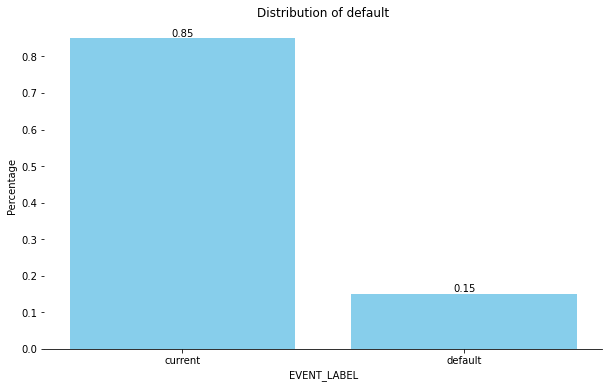

In [9]:
plt.figure(figsize=(10, 6))
bars = plt.bar(event_label_distribution.index, event_label_distribution.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')  # Removed the '%' sign

plt.title('Distribution of default')
plt.xlabel('EVENT_LABEL')
plt.ylabel('Percentage')

# Get rid of grid lines
plt.grid(False)

# Remove outlines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

In [10]:
missing_pct = loan.isnull().sum().div(loan.shape[0]).apply(lambda x:format(x,'.2%')).reset_index()
missing_pct.columns = ['Variable Name', 'Missing Percentage']
missing_pct

Variable Name Missing Percentage
0                           id              0.01%
1                    member_id              0.01%
2                    loan_amnt              0.01%
3                  funded_amnt              0.01%
4              funded_amnt_inv              0.01%
5                         term              0.01%
6                     int_rate              0.01%
7                  installment              0.01%
8                        grade              0.01%
9                    sub_grade              0.01%
10                   emp_title              6.12%
11                  emp_length              2.56%
12              home_ownership              0.01%
13                  annual_inc              0.01%
14         verification_status              0.01%
15                     issue_d              0.01%
16                 loan_status              0.00%
17                  pymnt_plan              0.01%
18                         url              0.01%
19                        desc             31.68%
20                     purpose              0.01%
21                       title              0.05%
22                    zip_code              0.01%
23                  addr_state              0.01%
24                         dti              0.01%
25                 delinq_2yrs              0.08%
26            earliest_cr_line              0.08%
27              fico_range_low              0.01%
28             fico_range_high              0.01%
29              inq_last_6mths              0.08%
30      mths_since_last_delinq             63.50%
31      mths_since_last_record             91.37%
32                    open_acc              0.08%
33                     pub_rec              0.08%
34                   revol_bal              0.01%
35                  revol_util              0.23%
36                   total_acc              0.08%
37                   out_prncp              0.01%
38               out_prncp_inv              0.01%
39          total_rec_late_fee              0.01%
40                last_pymnt_d              0.23%
41             last_pymnt_amnt              0.01%
42                next_pymnt_d             92.10%
43          last_credit_pull_d              0.02%
44  collections_12_mths_ex_med              0.35%
45                 policy_code              0.01%
46            application_type              0.01%
47              acc_now_delinq              0.08%
48    chargeoff_within_12_mths              0.35%
49                 delinq_amnt              0.08%
50        pub_rec_bankruptcies              3.24%
51                   tax_liens              0.27%

In [11]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [12]:
cat = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'purpose', 'zip_code', 'addr_state', 'verification_status']
num = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 
       'dti', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 
       'revol_bal', 'total_acc', 'pub_rec_bankruptcies']
rate_cat_to_num = ['int_rate', 'revol_util']
date_cat_to_num = ['issue_d', 'earliest_cr_line', 'last_credit_pull_d']

In [13]:
# Transform rates into numeric

loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float64')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float64')

In [14]:
# Calculate the count of months from each date up to Dec-2023

def count_month(feature):
    dates_datetime = pd.to_datetime(loan[feature], format='%b-%Y')
    end_date = pd.Timestamp('Dec-2023')
    loan[feature] = ((end_date.year - dates_datetime.dt.year) * 12 + (end_date.month - dates_datetime.dt.month))

for i in date_cat_to_num:
    count_month(i)

### Select num and cat features that might be useful
* Do exploratory analysis on them to eliminate redundant

In [15]:
numeric_features = num + rate_cat_to_num + date_cat_to_num
categorical_features = cat
print('Number of numeric features:', len(numeric_features))
print(numeric_features)
print('Number of categorical features:', len(categorical_features))
print(categorical_features)

Number of numeric features: 19
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies', 'int_rate', 'revol_util', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d']
Number of categorical features: 10
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'purpose', 'zip_code', 'addr_state', 'verification_status']


# Part 1 - EDA

In [18]:
# Need to use a previous version of pandas to match seaborn
# !pip uninstall pandas
# !pip install pandas==1.5.2
print(pd.__version__)

1.5.2


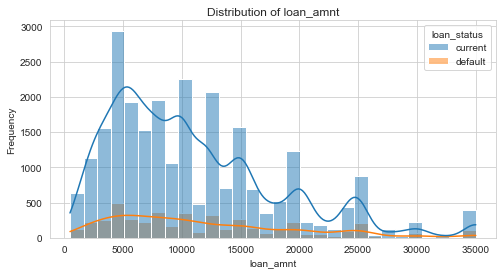

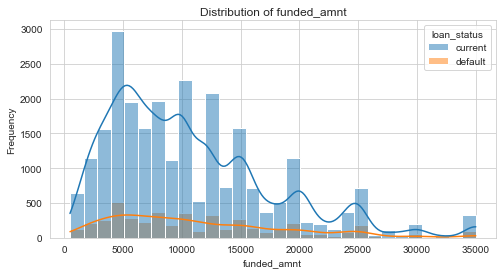

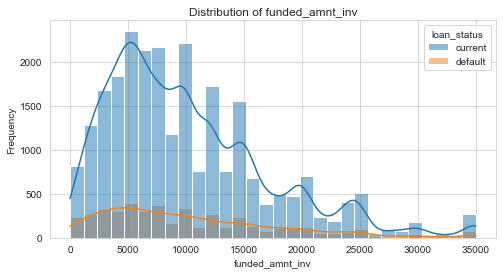

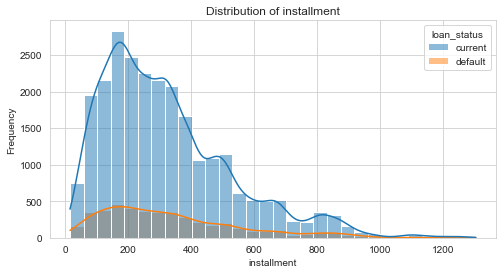

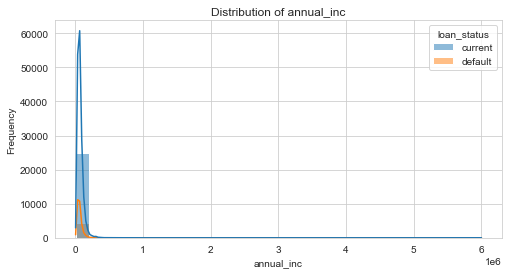

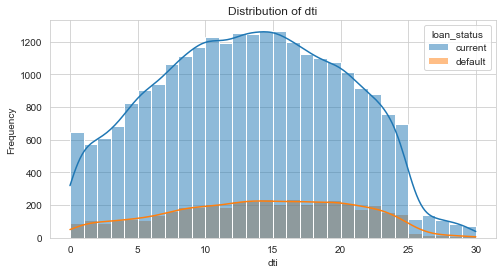

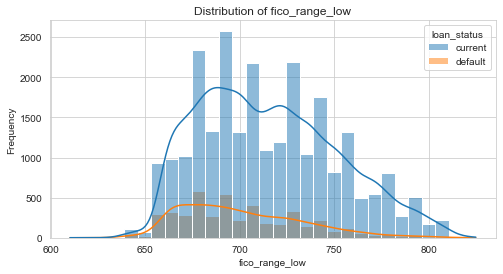

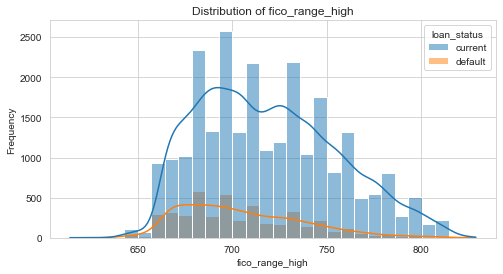

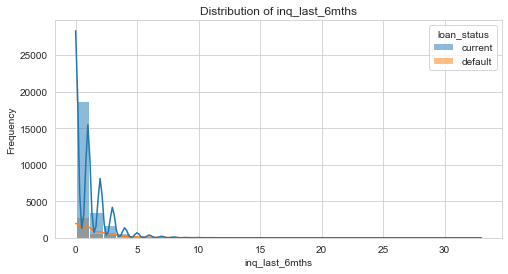

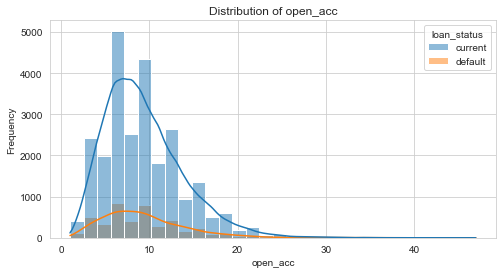

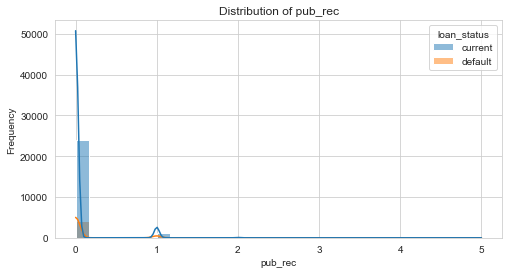

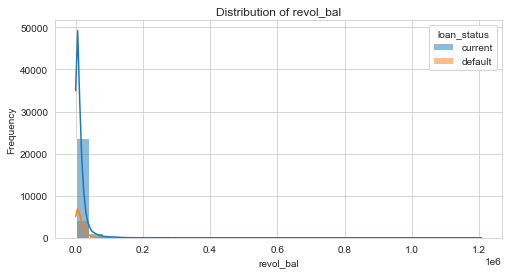

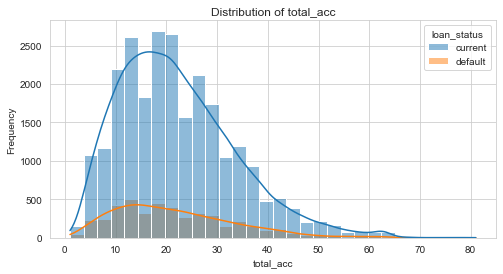

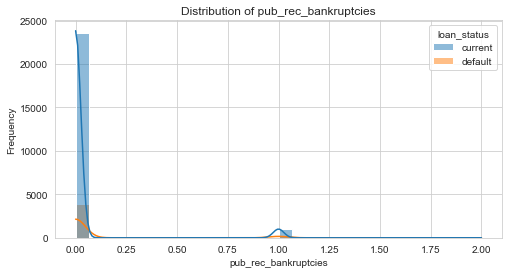

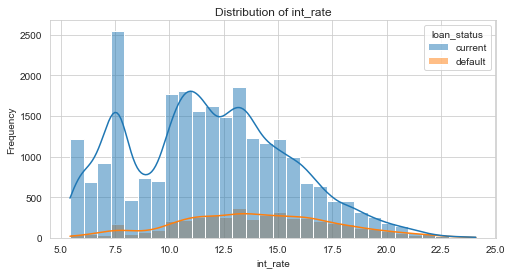

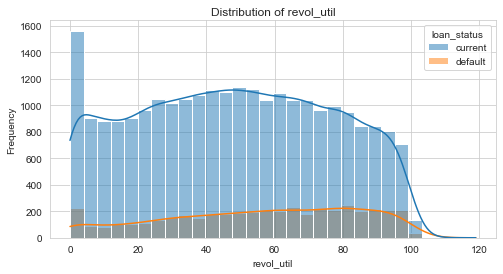

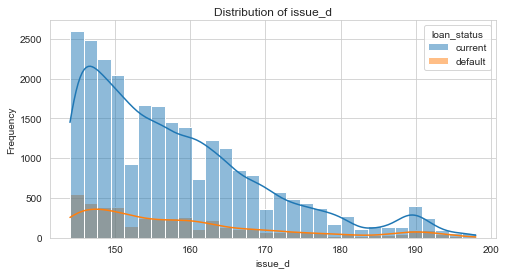

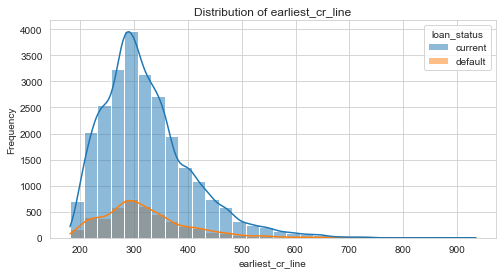

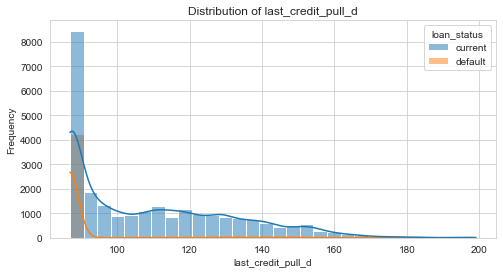

In [19]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan, x=col, hue='loan_status', kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

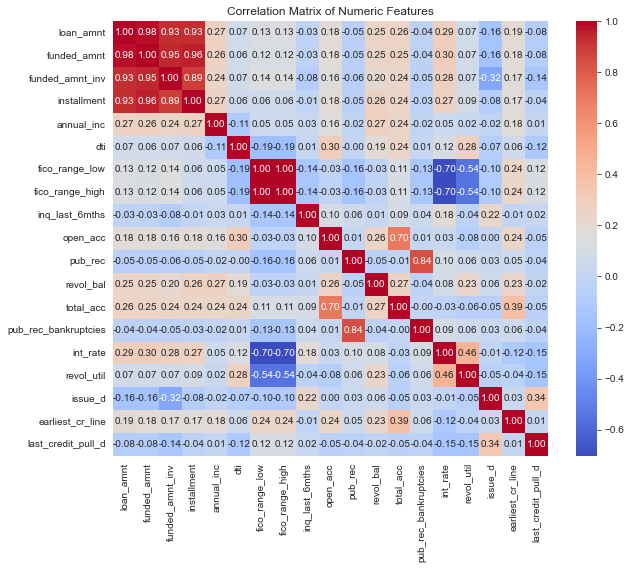

In [20]:
# Compute the correlation matrix
corr = loan[numeric_features].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [21]:
loan[numeric_features].corr()

loan_amnt  funded_amnt  funded_amnt_inv  installment  \
loan_amnt              1.000000     0.981859         0.928723     0.931040   
funded_amnt            0.981859     1.000000         0.946322     0.956712   
funded_amnt_inv        0.928723     0.946322         1.000000     0.888913   
installment            0.931040     0.956712         0.888913     1.000000   
annual_inc             0.266371     0.262227         0.241750     0.266363   
dti                    0.065216     0.064302         0.069469     0.055694   
fico_range_low         0.129247     0.121071         0.141781     0.058972   
fico_range_high        0.129247     0.121071         0.141781     0.058972   
inq_last_6mths        -0.030824    -0.030344        -0.078271    -0.010530   
open_acc               0.181247     0.178910         0.159299     0.181188   
pub_rec               -0.052624    -0.053025        -0.056516    -0.045178   
revol_bal              0.251019     0.246531         0.203765     0.263561   
total_acc              0.258210     0.252556         0.240382     0.236886   
pub_rec_bankruptcies  -0.037727    -0.038008        -0.045950    -0.032186   
int_rate               0.292174     0.295130         0.278899     0.272285   
revol_util             0.066071     0.069582         0.071051     0.094331   
issue_d               -0.156024    -0.162045        -0.323538    -0.078656   
earliest_cr_line       0.191375     0.184086         0.167630     0.167946   
last_credit_pull_d    -0.082409    -0.083706        -0.135345    -0.038663   

                      annual_inc       dti  fico_range_low  fico_range_high  \
loan_amnt               0.266371  0.065216        0.129247         0.129247   
funded_amnt             0.262227  0.064302        0.121071         0.121071   
funded_amnt_inv         0.241750  0.069469        0.141781         0.141781   
installment             0.266363  0.055694        0.058972         0.058972   
annual_inc              1.000000 -0.110412        0.049251         0.049251   
dti                    -0.110412  1.000000       -0.189247        -0.189247   
fico_range_low          0.049251 -0.189247        1.000000         1.000000   
fico_range_high         0.049251 -0.189247        1.000000         1.000000   
inq_last_6mths          0.025374  0.013047       -0.141032        -0.141032   
open_acc                0.160347  0.299711       -0.030234        -0.030234   
pub_rec                -0.017614 -0.001398       -0.155576        -0.155576   
revol_bal               0.274796  0.187671       -0.025977        -0.025977   
total_acc               0.237292  0.243310        0.107180         0.107180   
pub_rec_bankruptcies   -0.016130  0.010976       -0.133766        -0.133766   
int_rate                0.052965  0.117192       -0.703473        -0.703473   
revol_util              0.019063  0.278250       -0.544699        -0.544699   
issue_d                -0.016405 -0.074106       -0.103232        -0.103232   
earliest_cr_line        0.181183  0.055170        0.237170         0.237170   
last_credit_pull_d      0.007781 -0.119582        0.118787         0.118787   

                      inq_last_6mths  open_acc   pub_rec  revol_bal  \
loan_amnt                  -0.030824  0.181247 -0.052624   0.251019   
funded_amnt                -0.030344  0.178910 -0.053025   0.246531   
funded_amnt_inv            -0.078271  0.159299 -0.056516   0.203765   
installment                -0.010530  0.181188 -0.045178   0.263561   
annual_inc                  0.025374  0.160347 -0.017614   0.274796   
dti                         0.013047  0.299711 -0.001398   0.187671   
fico_range_low             -0.141032 -0.030234 -0.155576  -0.025977   
fico_range_high            -0.141032 -0.030234 -0.155576  -0.025977   
inq_last_6mths              1.000000  0.097117  0.058491   0.013200   
open_acc                    0.097117  1.000000  0.007975   0.259627   
pub_rec                     0.058491  0.007975  1.000000  -0.049576   
revol_bal                   

### Findings from num EDA
High correlation: 
* loan_amnt(applied by borrowers)
* funded_amnt(committed to that loan)
* funded_amnt_inv(committed by investors)
* installment(monthly payment)

In [22]:
categorical_features_eda = [
    'term',
    'grade',
    'sub_grade',
    'emp_length',
    'home_ownership',
    'purpose',
    'addr_state',
    'verification_status']

        term  total_count
0  36 months        22160
1  60 months         7614


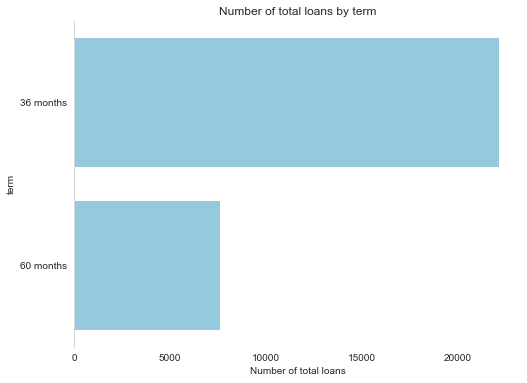

        term  fraud_count
0  36 months         2704
1  60 months         1773


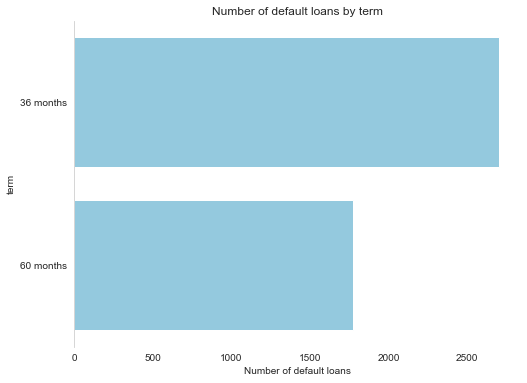

------------------------------------------------------------------------
  grade  total_count
0     B         8620
1     A         7142
2     C         6068
3     D         4268
4     E         2391
5     F          909
6     G          376


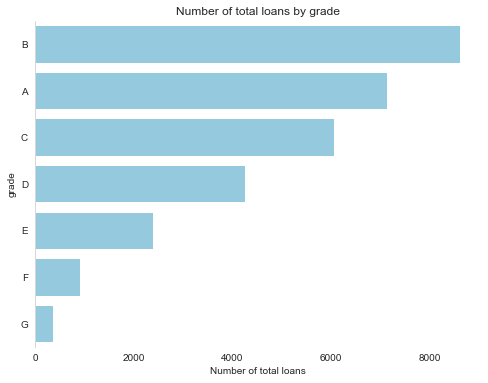

  grade  fraud_count
0     B         1030
1     C         1020
2     D          951
3     E          618
4     A          433
5     F          298
6     G          127


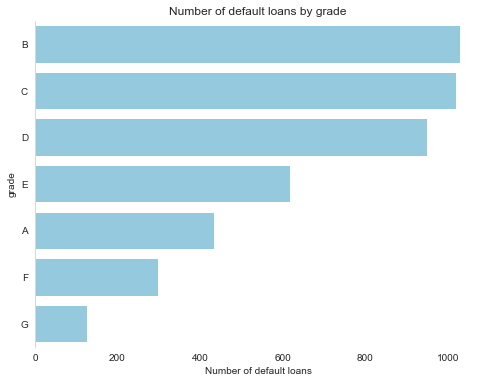

------------------------------------------------------------------------
   sub_grade  total_count
0         B3         2088
1         A4         2044
2         A5         1957
3         B5         1932
4         B4         1774
5         C1         1601
6         B2         1486
7         C2         1461
8         B1         1340
9         A3         1244
10        C3         1178
11        A2         1109
12        D2         1072
13        C4          940
14        D3          922
15        C5          888
16        D4          806
17        A1          788
18        D1          748
19        D5          720
20        E1          609
21        E2          560
22        E3          475
23        E4          391
24        E5          356
25        F1          274
26        F2          210
27        F3          176
28        F4          147
29        F5          102
30        G1          102
31        G4           76
32        G2           75
33        G5           63
34        G3     

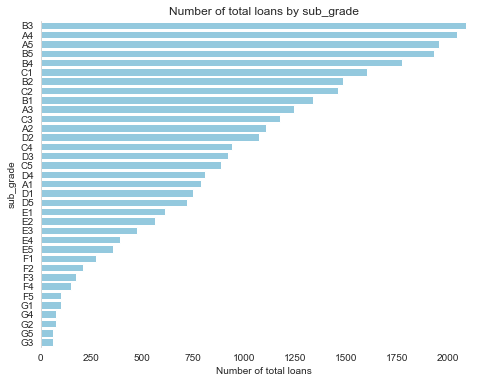

   sub_grade  fraud_count
0         B5          267
1         C1          253
2         B4          237
3         C2          236
4         B3          231
5         D2          223
6         D3          215
7         C3          215
8         D4          188
9         D5          184
10        B2          161
11        A5          161
12        E1          160
13        C4          158
14        C5          158
15        E2          144
16        D1          141
17        B1          134
18        A4          126
19        E4          110
20        E3          109
21        E5           95
22        F1           84
23        A3           67
24        F2           60
25        A2           58
26        F4           54
27        F5           51
28        F3           49
29        G1           31
30        G2           30
31        G4           23
32        G5           22
33        A1           21
34        G3           21


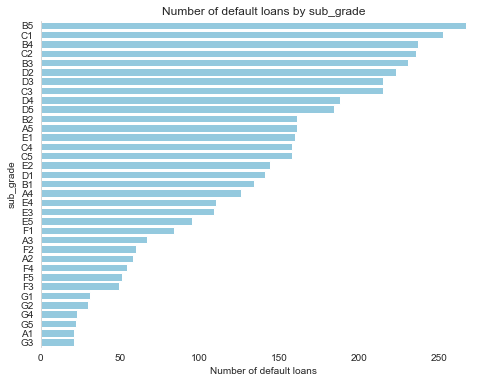

------------------------------------------------------------------------
   emp_length  total_count
0   10+ years         6577
1    < 1 year         3491
2     2 years         3313
3     3 years         3008
4     4 years         2563
5      1 year         2537
6     5 years         2441
7     6 years         1681
8     7 years         1305
9     8 years         1126
10    9 years          973


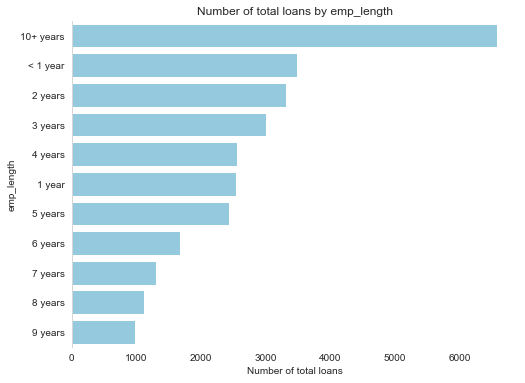

   emp_length  fraud_count
0   10+ years         1042
1    < 1 year          544
2     2 years          456
3     3 years          417
4      1 year          385
5     5 years          367
6     4 years          363
7     6 years          245
8     7 years          199
9     8 years          159
10    9 years          132


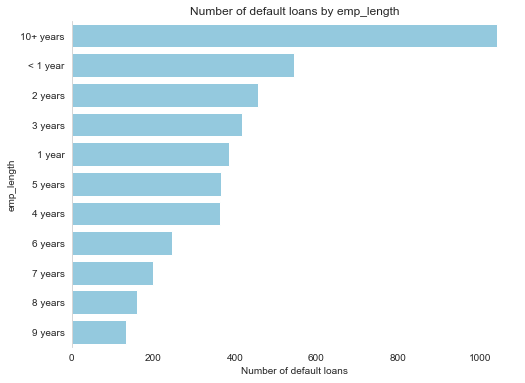

------------------------------------------------------------------------
  home_ownership  total_count
0           RENT        14064
1       MORTGAGE        13340
2            OWN         2275
3          OTHER           91
4           NONE            4


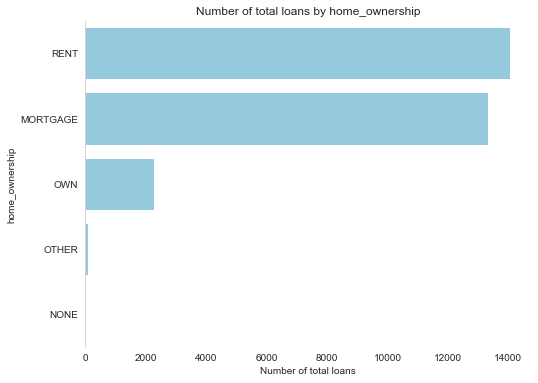

  home_ownership  fraud_count
0           RENT         2211
1       MORTGAGE         1906
2            OWN          344
3          OTHER           15
4           NONE            1


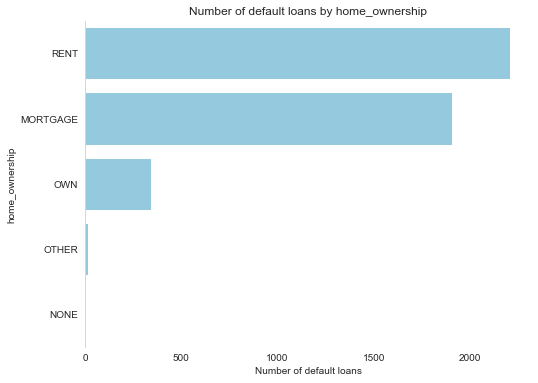

------------------------------------------------------------------------
               purpose  total_count
0   debt_consolidation        13816
1          credit_card         3850
2                other         3108
3     home_improvement         2226
4       major_purchase         1643
5       small_business         1387
6                  car         1118
7              wedding          704
8              medical          528
9               moving          448
10               house          313
11         educational          279
12            vacation          277
13    renewable_energy           77


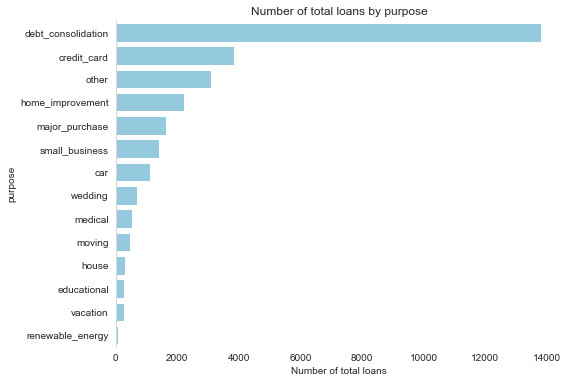

               purpose  fraud_count
0   debt_consolidation         2144
1                other          512
2          credit_card          430
3       small_business          377
4     home_improvement          302
5       major_purchase          180
6                  car          119
7              medical           93
8               moving           79
9              wedding           71
10         educational           60
11               house           55
12            vacation           42
13    renewable_energy           13


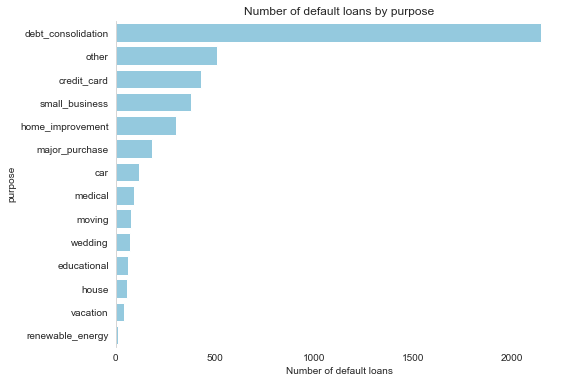

------------------------------------------------------------------------
   addr_state  total_count
0          CA         5188
1          NY         2836
2          FL         2200
3          TX         2067
4          NJ         1408
5          IL         1174
6          PA         1128
7          GA         1058
8          VA         1056
9          MA         1012
10         OH          912
11         MD          773
12         AZ          667
13         WA          617
14         NC          603
15         CT          575
16         CO          564
17         MI          551
18         MO          549
19         MN          449
20         NV          375
21         WI          361
22         SC          350
23         AL          339
24         OR          332
25         LA          312
26         KY          265
27         KS          212
28         OK          208
29         AR          192
30         UT          185
31         DC          164
32         NM          140
33       

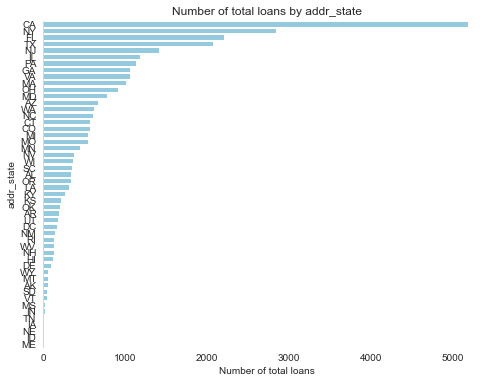

   addr_state  fraud_count
0          CA          893
1          FL          400
2          NY          370
3          TX          262
4          NJ          225
5          GA          167
6          IL          166
7          PA          161
8          MA          134
9          VA          130
10         MD          125
11         OH          111
12         AZ          104
13         MO          100
14         WA           96
15         NC           91
16         NV           82
17         MI           82
18         CT           76
19         CO           66
20         MN           56
21         WI           55
22         OR           55
23         SC           52
24         KY           47
25         AL           39
26         LA           35
27         UT           35
28         OK           31
29         NM           28
30         KS           26
31         AR           22
32         HI           20
33         NH           19
34         WV           18
35         RI           15
3

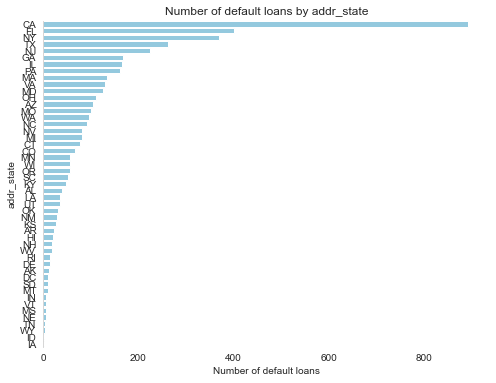

------------------------------------------------------------------------
  verification_status  total_count
0        Not Verified        13128
1            Verified         9460
2     Source Verified         7186


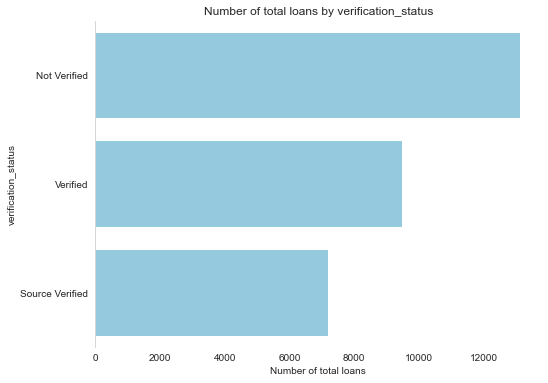

  verification_status  fraud_count
0        Not Verified         1855
1            Verified         1555
2     Source Verified         1067


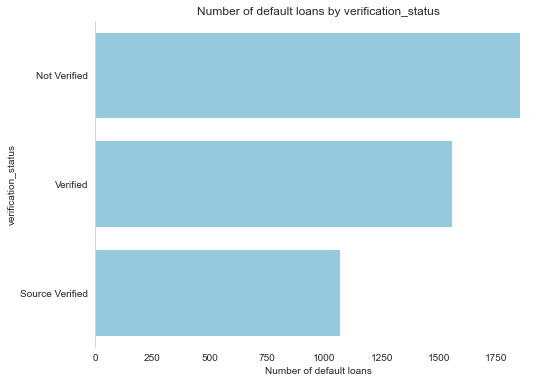

------------------------------------------------------------------------


In [23]:
# Total transaction count and default count for each categorical variable

filter_mask = loan["loan_status"] == 'default'

for feature in categorical_features_eda:
    gb = loan[feature].value_counts().reset_index()
    gb.columns = [feature, 'total_count']
    print(gb)
    
    plt.figure(figsize = (8,6))
    sns.barplot(data = gb,
                x = 'total_count',
                y = feature,
                color = "skyblue")
    
    # Get rid of grid lines
    plt.grid(False)

    # Remove outlines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    plt.xlabel("Number of total loans")
    plt.ylabel(feature)
    plt.title(f"Number of total loans by {feature}")
    plt.show()
    
    
    gbdefault = loan[filter_mask][feature].value_counts().reset_index()
    gbdefault.columns = [feature, 'fraud_count']
    print(gbdefault)
    
    #####
    
    plt.figure(figsize = (8,6))
    sns.barplot(data = gbdefault,
                x = 'fraud_count',
                y = feature,
                color = "skyblue")
    
    # Get rid of grid lines
    plt.grid(False)

    # Remove outlines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    plt.xlabel("Number of default loans")
    plt.ylabel(feature)
    plt.title(f"Number of default loans by {feature}")
    plt.show()
    
    print('---'*24)

        term  fraud_rate(%)
1  60 months      23.286052
0  36 months      12.202166


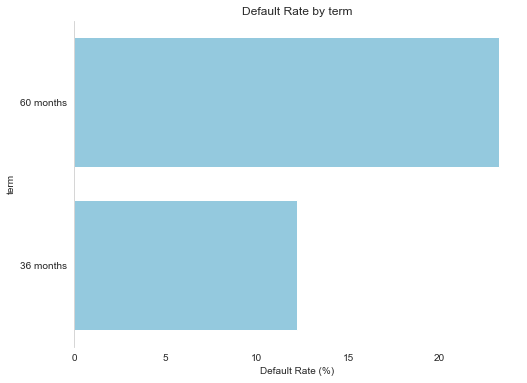

------------------------------------------------------------------------
  grade  fraud_rate(%)
6     G      33.776596
5     F      32.783278
4     E      25.846926
3     D      22.282099
2     C      16.809492
0     B      11.948956
1     A       6.062728


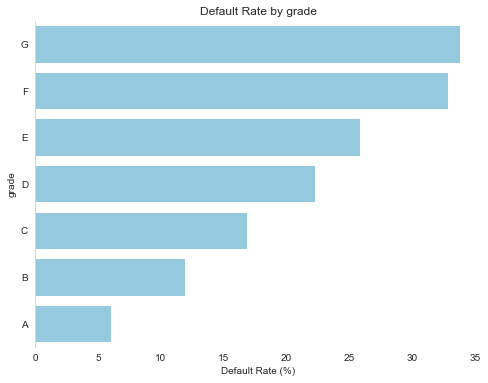

------------------------------------------------------------------------
   sub_grade  fraud_rate(%)
29        F5      50.000000
32        G2      40.000000
28        F4      36.734694
34        G3      35.000000
33        G5      34.920635
25        F1      30.656934
30        G1      30.392157
31        G4      30.263158
26        F2      28.571429
23        E4      28.132992
27        F3      27.840909
24        E5      26.685393
20        E1      26.272578
21        E2      25.714286
19        D5      25.555556
16        D4      23.325062
14        D3      23.318872
22        E3      22.947368
12        D2      20.802239
18        D1      18.850267
10        C3      18.251273
15        C5      17.792793
13        C4      16.808511
7         C2      16.153320
5         C1      15.802623
3         B5      13.819876
4         B4      13.359639
0         B3      11.063218
6         B2      10.834455
8         B1      10.000000
2         A5       8.226878
1         A4       6.164384
9  

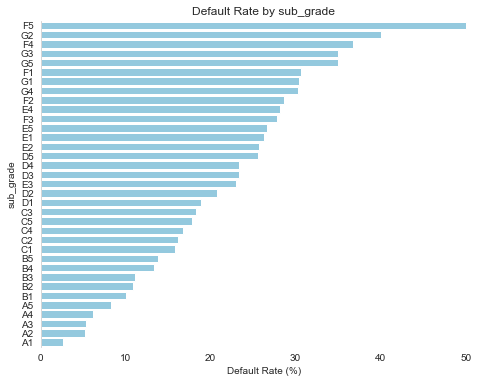

------------------------------------------------------------------------
   emp_length  fraud_rate(%)
0   10+ years      15.843090
1    < 1 year      15.582928
8     7 years      15.249042
5      1 year      15.175404
6     5 years      15.034822
7     6 years      14.574658
4     4 years      14.163090
9     8 years      14.120782
3     3 years      13.863032
2     2 years      13.763960
10    9 years      13.566290


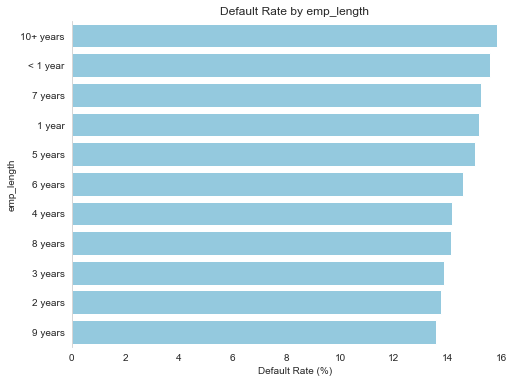

------------------------------------------------------------------------
  home_ownership  fraud_rate(%)
4           NONE      25.000000
3          OTHER      16.483516
0           RENT      15.720990
2            OWN      15.120879
1       MORTGAGE      14.287856


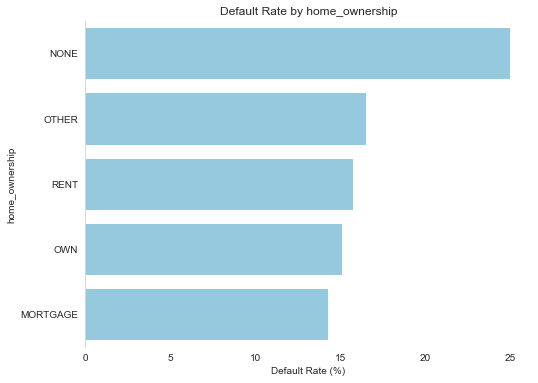

------------------------------------------------------------------------
               purpose  fraud_rate(%)
5       small_business      27.180966
11         educational      21.505376
9               moving      17.633929
8              medical      17.613636
10               house      17.571885
13    renewable_energy      16.883117
2                other      16.473616
0   debt_consolidation      15.518240
12            vacation      15.162455
3     home_improvement      13.566936
1          credit_card      11.168831
4       major_purchase      10.955569
6                  car      10.644007
7              wedding      10.085227


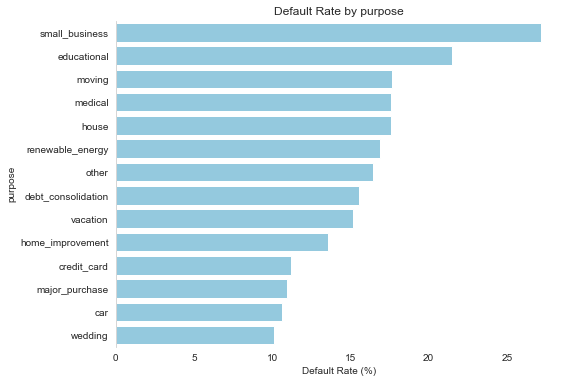

------------------------------------------------------------------------
   addr_state  fraud_rate(%)
47         NE      55.555556
44         IN      40.000000
43         MS      26.315789
20         NV      21.866667
45         TN      21.428571
41         SD      20.833333
32         NM      20.000000
40         AK      19.298246
30         UT      18.918919
18         MO      18.214936
2          FL      18.181818
26         KY      17.735849
0          CA      17.212799
39         MT      16.666667
48         ID      16.666667
24         OR      16.566265
36         HI      16.528926
11         MD      16.170763
4          NJ      15.980114
7          GA      15.784499
12         AZ      15.592204
13         WA      15.559157
21         WI      15.235457
14         NC      15.091211
28         OK      14.903846
17         MI      14.882033
22         SC      14.857143
35         NH      14.843750
6          PA      14.273050
5          IL      14.139693
34         WV      13.740458

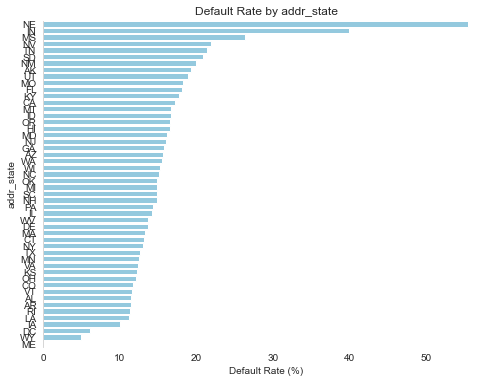

------------------------------------------------------------------------
  verification_status  fraud_rate(%)
1            Verified      16.437632
2     Source Verified      14.848316
0        Not Verified      14.130104


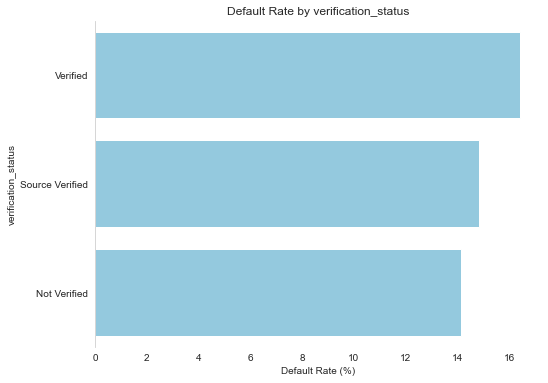

------------------------------------------------------------------------


In [24]:
# Fraud rate for each categorical variable

for feature in categorical_features_eda:
    gb1 = loan[filter_mask][feature].value_counts().reset_index()
    gb2 = loan[feature].value_counts().reset_index()
    gb1.columns = [feature, 'fraud_count']
    gb2.columns = [feature, 'total_count']
    gb = pd.merge(gb1, gb2, on = feature, how = 'right')
    gb['fraud_rate(%)'] = gb['fraud_count'] / gb['total_count'] * 100
    gb = gb.sort_values(by = 'fraud_rate(%)', ascending = False)
    print(gb[[feature, 'fraud_rate(%)']])
    
    plt.figure(figsize = (8,6))
    sns.barplot(data=gb, 
                x='fraud_rate(%)', 
                y=feature, 
                color = 'skyblue')
    
    # Get rid of grid lines
    plt.grid(False)
    
    # Remove outlines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    plt.xlabel('Default Rate (%)')
    plt.ylabel(feature)
    plt.title(f"Default Rate by {feature}")
    plt.show()
    
    print('---'*24)

### Findings from cat EDA
* Interestingly, 'verification_status' shows that verified loans have a higher fraud rate than non-verified ones.
* loan term has a significant predictive power. 60 months bears higher default rate than 36 months.

# Part 2 - Feature engineering

In [25]:
target = 'loan_status'

In [26]:
# We only include useful numeric and categorical features

numeric_features = ['installment', 'annual_inc', 'dti', 'fico_range_low', 'inq_last_6mths', 
                    'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies', 
                    'int_rate', 'revol_util', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d']
categorical_features = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 
                        'home_ownership', 'purpose', 'zip_code', 'addr_state', 'verification_status']

In [27]:
# Define the target variable

y = loan['loan_status'].map({'current': 0, 'default': 1})  # Convert to binary
X = loan.drop('loan_status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(loan[numeric_features + categorical_features], y, test_size=0.2, random_state=42)


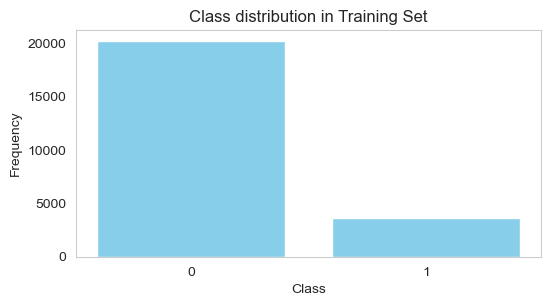

In [28]:
def plot_class_distribution(y, title='Class distribution'):
    counter = Counter(y)
    plt.figure(figsize=(6, 3), dpi=100)
    plt.bar(counter.keys(), counter.values(), color='skyblue')
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Class')
    plt.xticks(list(counter.keys()))
    
    # Remove gridlines
    plt.grid(False)
    
    plt.show()

plot_class_distribution(y_train, 'Class distribution in Training Set')

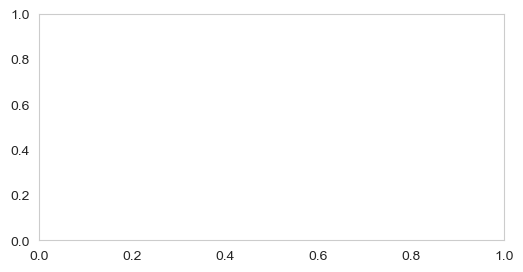

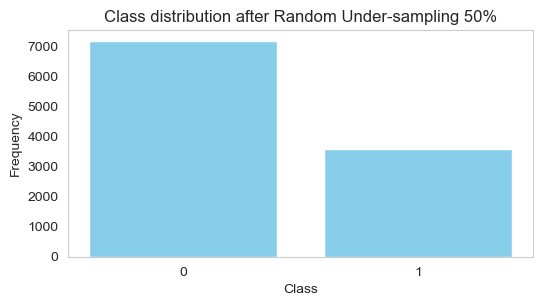

In [29]:
# Use under-sampling to handle unbalanced data

rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_train, y_train = rus.fit_resample(X_train, y_train)
plt.figure(figsize=(6, 3), dpi = 100)
plt.grid(False)
plot_class_distribution(y_train, 'Class distribution after Random Under-sampling 50%')

# Part 3 - Model Building

In [30]:
# Define transformer for preproccessing

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Put missing value in category 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

In [31]:
# Define evaluation function 'model_evaluation'

def model_evaluation(pipeline):

    # Predictions for the training set
    y_train_pred = pipeline.predict(X_train)
    y_train_prob = pipeline.predict_proba(X_train)[:, 1]

    # Predictions for the test set
    y_test_pred = pipeline.predict(X_test)
    y_test_prob = pipeline.predict_proba(X_test)[:, 1]

    # Binarize labels for AUC calculation
    lb = LabelBinarizer()
    y_train_binarized = lb.fit_transform(y_train).ravel()
    y_test_binarized = lb.transform(y_test).ravel()

    # Calculating metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred, )
    test_precision = precision_score(y_test, y_test_pred, )

    train_recall = recall_score(y_train, y_train_pred, )
    test_recall = recall_score(y_test, y_test_pred, )

    train_f1 = f1_score(y_train, y_train_pred, )
    test_f1 = f1_score(y_test, y_test_pred, )

    train_auc = roc_auc_score(y_train_binarized, y_train_prob)
    test_auc = roc_auc_score(y_test_binarized, y_test_prob)

    # Print Metrics
    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision (default): {train_precision:.4f}")
    print(f"Recall (default): {train_recall:.4f}")
    print(f"F1 Score (default): {train_f1:.4f}")
    print(f"AUC: {train_auc:.4f}")

    print("\nTest Metrics:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision (default): {test_precision:.4f}")
    print(f"Recall (default): {test_recall:.4f}")
    print(f"F1 Score (default): {test_f1:.4f}")
    print(f"AUC: {test_auc:.4f}")


### 3.1 - Logistic Regression

In [32]:
# Fit baseline Logistic Regression Model

# Define the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter = 300,
                                                                random_state = 42))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:,1]

# Evaluation Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Print the metrics
print("Baseline Logistic Regression Model Evaluation:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  AUC: {auc_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")

Baseline Logistic Regression Model Evaluation:
  Accuracy: 0.8104
  AUC: 0.8160
  Precision: 0.4017
  Recall: 0.5755


In [40]:
# Tuning
# Create the parameter grid
param_grid = {
    'classifier__max_iter': [300],
    'classifier__penalty': ['l2', 'elasticnet'],
    'classifier__C': [0.01, 0.1, 1]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(lr_pipeline, param_grid, cv = 3, n_jobs = -1, scoring = 'roc_auc', verbose = 1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters:
  classifier__C: 0.01
  classifier__max_iter: 300
  classifier__penalty: l2


In [46]:
# Fit the model with the best parameters in Gridsearch
lr_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(penalty = 'l2',
                                                                C = 0.1,
                                                                max_iter = 300,
                                                                random_state = 42))])

# Train the Logistic Regression model
lr_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['installment', 'annual_inc',
                                                   'dti', 'fico_range_low',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'total_acc',
                                                   'pub_rec_bankruptcies',
                                                   'int_rate', 'revol_util',
                                     

In [47]:
model_evaluation(lr_pipeline_hpo)

Training Metrics:
Accuracy: 0.8097
Precision (default): 0.7344
Recall (default): 0.6721
F1 Score (default): 0.7019
AUC: 0.8694

Test Metrics:
Accuracy: 0.8222
Precision (default): 0.4288
Recall (default): 0.6084
F1 Score (default): 0.5031
AUC: 0.8292


### 3.2 - Random Forest

In [48]:
# Fit baseline Random Forest Model

# Define the Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators = 50, 
                                                                    min_samples_split = 10, 
                                                                    n_jobs = -1, 
                                                                    random_state = 42))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Print the metrics
print("Baseline Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")

Baseline Random Forest Model Evaluation:
  Accuracy: 0.8546
  AUC: 0.8661
  Precision: 0.5093
  Recall: 0.4642


In [49]:
# Tuning
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [20, 30, 50],
    #'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [5, 10],
    #'classifier__min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
random_search = RandomizedSearchCV(rf_pipeline, param_grid, cv = 3, n_jobs = -1, scoring = 'roc_auc', verbose = 1)

# Fit the GridSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = random_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters:
  classifier__n_estimators: 50
  classifier__min_samples_split: 10


In [50]:
# Fit the model with the best parameters in Gridsearch
rf_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50,
                                                                    min_samples_split=10,
                                                                    #min_samples_leaf=2,
                                                                    #max_depth=10,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['installment', 'annual_inc',
                                                   'dti', 'fico_range_low',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'total_acc',
                                                   'pub_rec_bankruptcies',
                                                   'int_rate', 'revol_util',
                                     

In [51]:
model_evaluation(rf_pipeline_hpo)

Training Metrics:
Accuracy: 0.9803
Precision (default): 0.9982
Recall (default): 0.9427
F1 Score (default): 0.9697
AUC: 0.9992

Test Metrics:
Accuracy: 0.8546
Precision (default): 0.5093
Recall (default): 0.4642
F1 Score (default): 0.4857
AUC: 0.8661


### 3.3 - Gradient Boost

In [53]:
# Fit baseline GBM Model

# Initialize the pipeline with the preprocessor and a Gradient Boosting classifier
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(learning_rate=0.1,
                                                                        n_estimators=100,
                                                                        random_state=42
                                                                    ))])
# Train the pipeline
gbm_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gbm = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:,1]

# Evaluation Metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)

# Print the metrics
print("Baseline GBM Model Evaluation:")
print(f"  Accuracy: {accuracy_gbm:.4f}")
print(f"  AUC: {auc_gbm:.4f}")
print(f"  Precision: {precision_gbm:.4f}")
print(f"  Recall: {recall_gbm:.4f}")

Baseline GBM Model Evaluation:
  Accuracy: 0.8217
  AUC: 0.8937
  Precision: 0.4424
  Recall: 0.7889


In [54]:
# Tuning
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [100,200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters:
  classifier__learning_rate: 0.1
  classifier__n_estimators: 200


In [55]:
# Fit the model with the best parameters in Gridsearch
gbm_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', GradientBoostingClassifier(learning_rate=0.1,
                                                                             n_estimators=200,
                                                                             random_state=42
                                                                             ))])
# Train the pipeline
gbm_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['installment', 'annual_inc',
                                                   'dti', 'fico_range_low',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'total_acc',
                                                   'pub_rec_bankruptcies',
                                                   'int_rate', 'revol_util',
                                     

In [56]:
model_evaluation(gbm_pipeline_hpo)

Training Metrics:
Accuracy: 0.8403
Precision (default): 0.7271
Recall (default): 0.8337
F1 Score (default): 0.7768
AUC: 0.9286

Test Metrics:
Accuracy: 0.8209
Precision (default): 0.4404
Recall (default): 0.7798
F1 Score (default): 0.5629
AUC: 0.8936


### 3.4 - Neural Network

In [57]:
# Fit baseline MLP Model

# Initialize the pipeline with the preprocessor and a MLP classifier
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', MLPClassifier(hidden_layer_sizes=(20,10,), 
                                                     activation='relu', 
                                                     solver='adam', 
                                                     max_iter=300, 
                                                     random_state=42
                                                     ))])

# Train the pipeline
mlp_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_pipeline.predict(X_test)
y_pred_proba_mlp = mlp_pipeline.predict_proba(X_test)[:,1]

# Evaluation Metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)

# Print the metrics
print("Baseline MLP Model Evaluation:")
print(f"  Accuracy: {accuracy_mlp:.4f}")
print(f"  AUC: {auc_mlp:.4f}")
print(f"  Precision: {precision_mlp:.4f}")
print(f"  Recall: {recall_mlp:.4f}")

Baseline MLP Model Evaluation:
  Accuracy: 0.7648
  AUC: 0.7804
  Precision: 0.3327
  Recall: 0.5868


In [58]:
# Tuning
# Create the parameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(20, 10), (30, 20), (50,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__max_iter': [300, 500],
}

# Instantiate the GridSearchCV object
random_search = RandomizedSearchCV(mlp_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = random_search.best_params_

# Print the best set of hyperparameters
print("Best Parameters: ", best_params)

ValueError: Invalid parameter mlp for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['installment', 'annual_inc',
                                                   'dti', 'fico_range_low',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'total_acc',
                                                   'pub_rec_bankruptcies',
                                                   'int_rate', 'revol_util',
                                                   'issue_d',
                                                   'earliest_cr_line'...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['term', 'grade', 'sub_grade',
                                                   'emp_title', 'emp_length',
                                                   'home_ownership', 'purpose',
                                                   'zip_code', 'addr_state',
                                                   'verification_status'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=300,
                               random_state=42))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [59]:
# Fit the model with the best parameters in Gridsearch
mlp_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', MLPClassifier(hidden_layer_sizes=(20,10,), 
                                                     activation='relu', 
                                                     solver='sgd', 
                                                     max_iter=300, 
                                                     random_state=42
                                                     ))])

# Train the pipeline
mlp_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['installment', 'annual_inc',
                                                   'dti', 'fico_range_low',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'total_acc',
                                                   'pub_rec_bankruptcies',
                                                   'int_rate', 'revol_util',
                                     

In [60]:
model_evaluation(mlp_pipeline_hpo)

Training Metrics:
Accuracy: 0.9228
Precision (default): 0.8629
Recall (default): 0.9135
F1 Score (default): 0.8875
AUC: 0.9732

Test Metrics:
Accuracy: 0.8136
Precision (default): 0.4266
Recall (default): 0.7560
F1 Score (default): 0.5455
AUC: 0.8811


### 3.5 - Stacking Classifier

In [61]:
# Fit the model with the best parameters in Gridsearch

# base estimators for stacker
base_estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=42)),
    ('lr', LogisticRegression(penalty = 'l2', C = 0.1, max_iter = 300, random_state = 42))
]

# final estimator on top

final_estimator = LogisticRegression(penalty = 'l2', C = 0.1, max_iter = 300, random_state = 42)

stacking_classifier = StackingClassifier(estimators = base_estimators,
                                         final_estimator = final_estimator,
                                         cv = 3,
                                         n_jobs = -1
)

sc_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', stacking_classifier)])


# Train the pipeline
sc_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['installment', 'annual_inc',
                                                   'dti', 'fico_range_low',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'total_acc',
                                                   'pub_rec_bankruptcies',
                                                   'int_rate', 'revol_util',
                                     

In [62]:
model_evaluation(sc_pipeline_hpo)

Training Metrics:
Accuracy: 0.8695
Precision (default): 0.7845
Recall (default): 0.8390
F1 Score (default): 0.8108
AUC: 0.9523

Test Metrics:
Accuracy: 0.8350
Precision (default): 0.4633
Recall (default): 0.7310
F1 Score (default): 0.5672
AUC: 0.8911


# Part 4 - A Model Comparison

In [63]:
models = {
    'Logistic Regression': lr_pipeline_hpo,
    'Random Forest': rf_pipeline_hpo,
    'Gradient Boost': gbm_pipeline_hpo,
    'Neural Network': mlp_pipeline_hpo,
    'Stacking Classifier': sc_pipeline_hpo
}

### 4.1 - ROC & PR Curves - Maintain a constant FPR level

In [64]:
from sklearn.preprocessing import LabelBinarizer


# Binarize labels for AUC calculation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train).ravel()
y_test_binarized = lb.transform(y_test).ravel()

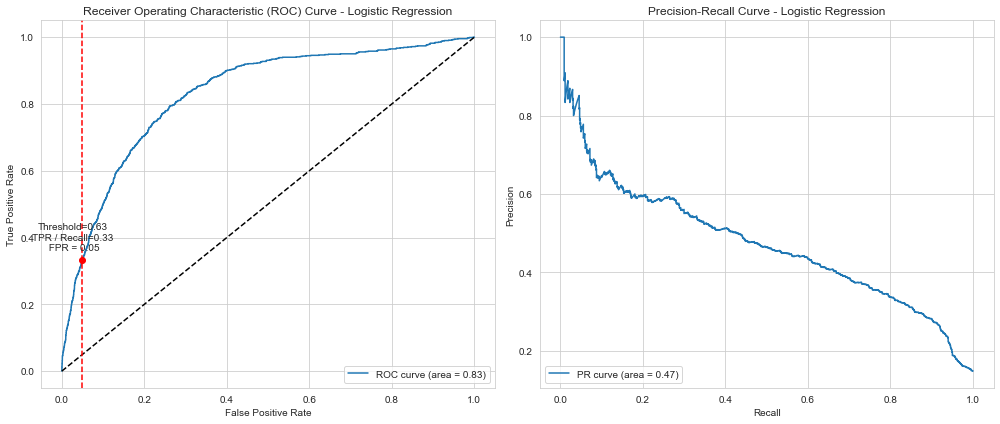

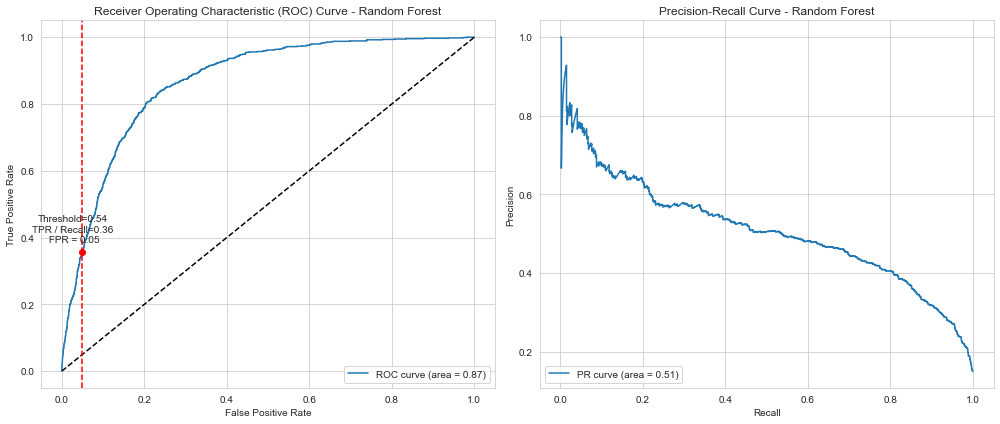

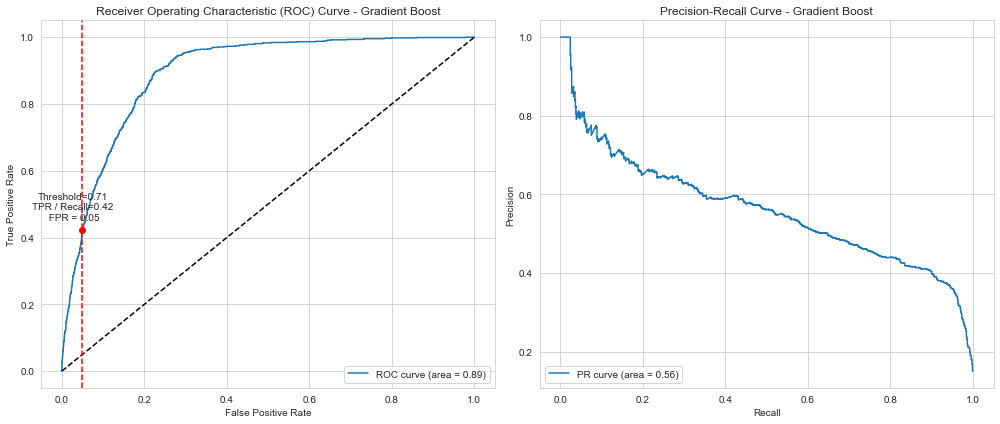

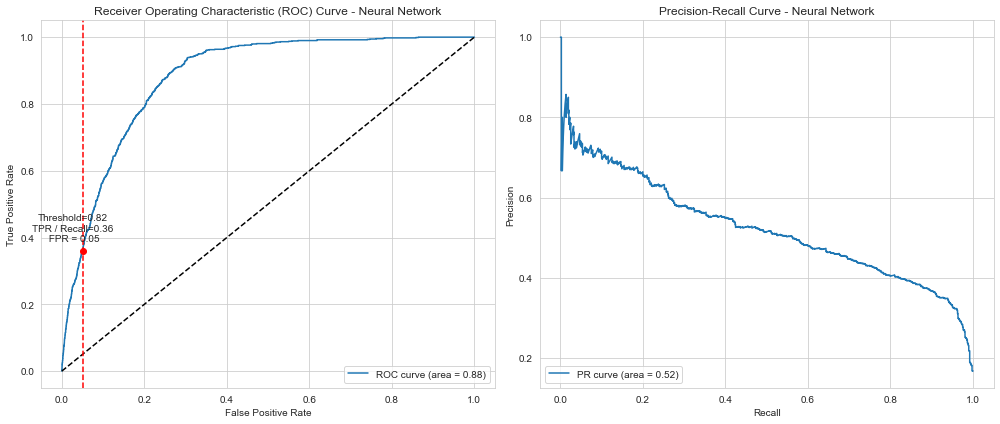

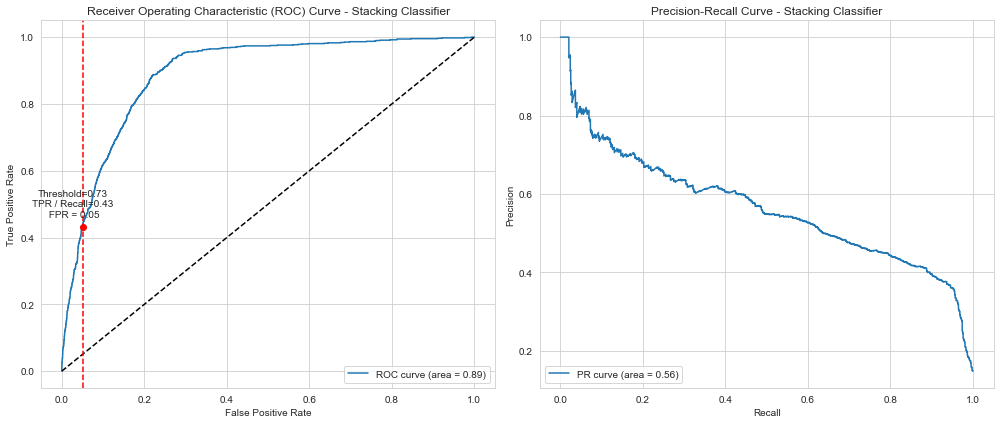

In [65]:
FPRlevel=0.05

for model_name, model_pipeline in models.items():
    # Calculate ROC
    fpr, tpr, thresholds_roc = roc_curve(y_test_binarized,
                                         model_pipeline.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    # Calculate precision and recall
    precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, 
                                                              model_pipeline.predict_proba(X_test)[:,1])
    pr_auc = auc(recall, precision)


    plt.figure(figsize=(14, 6))


    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

    # Highlight the 5% FPR with a vertical line
    idx = next(i for i, x in enumerate(fpr) if x >= FPRlevel)  # Find the index for FPR just over the preset level
    plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for preset FPR
    plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

    # Adding a text annotation for the threshold
    plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR / Recall={tpr[idx]:.2f}\n FPR = {FPRlevel}', 
                (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")


    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()


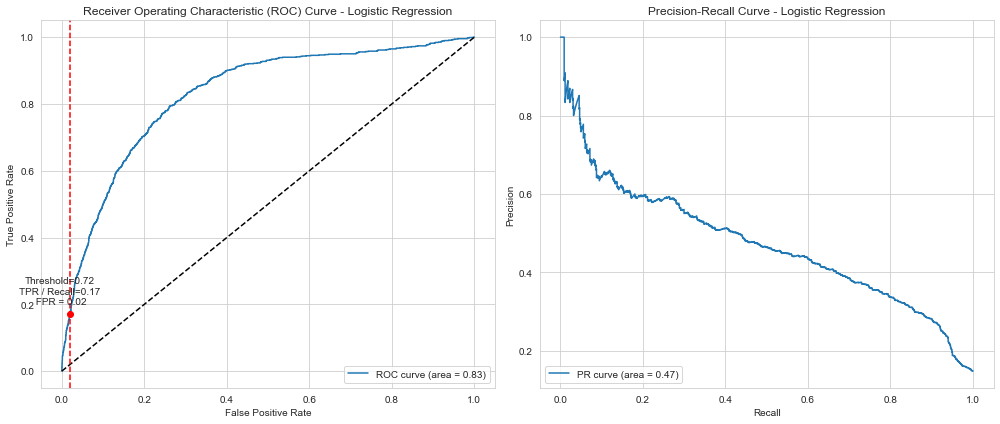

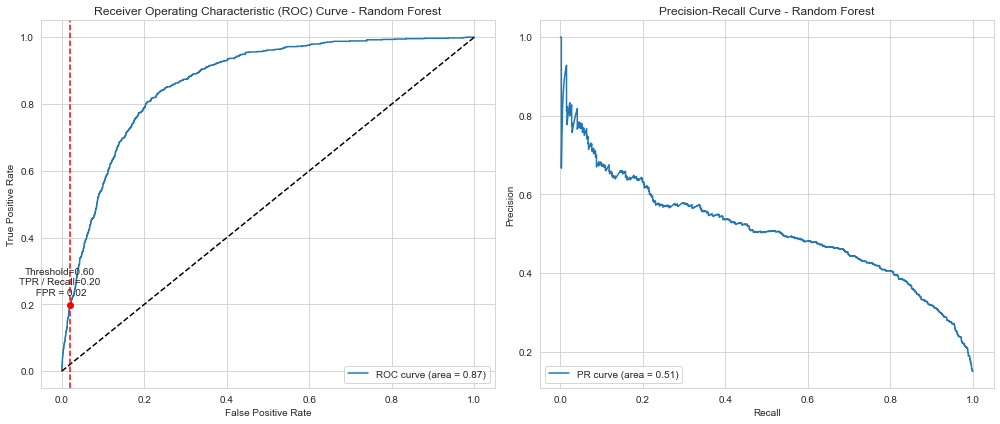

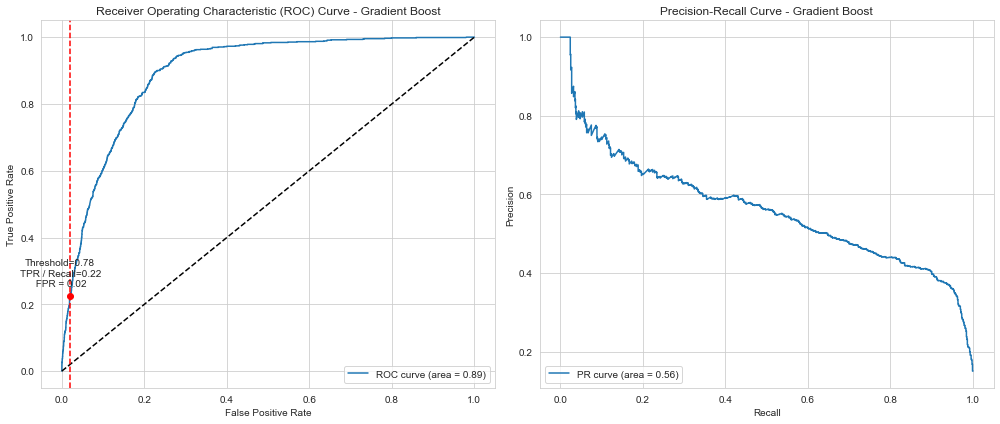

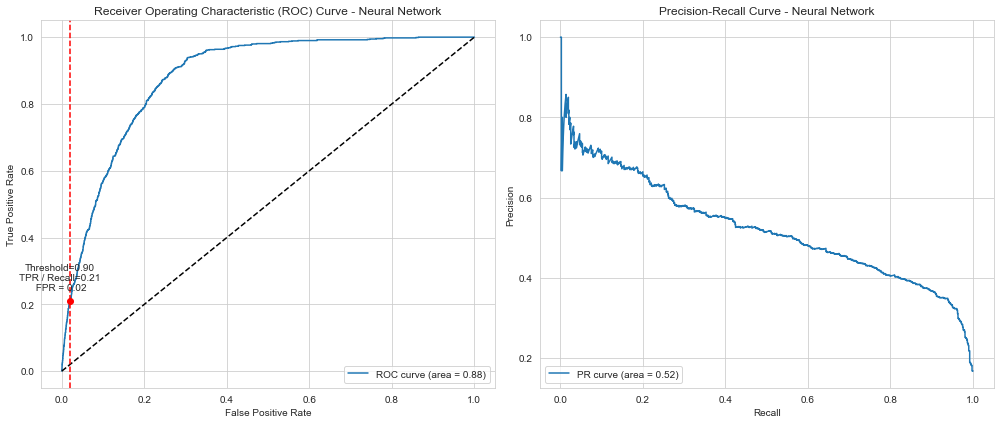

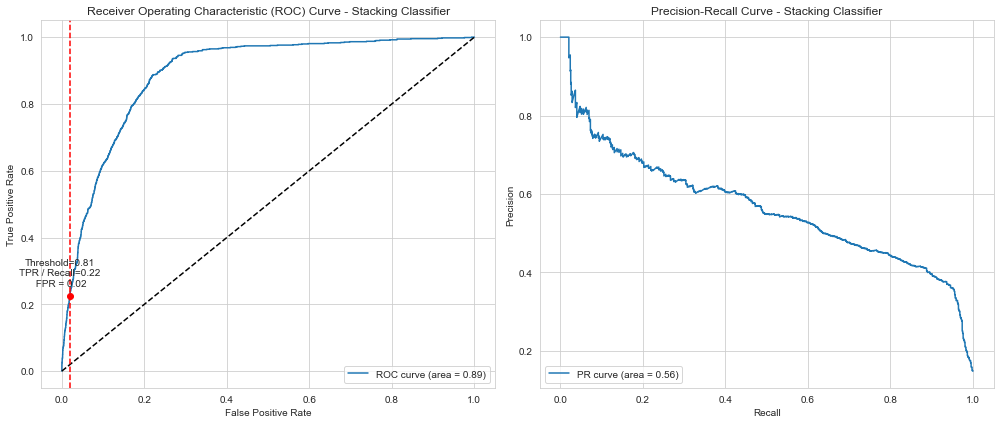

In [66]:
FPRlevel=0.02

for model_name, model_pipeline in models.items():
    # Calculate ROC
    fpr, tpr, thresholds_roc = roc_curve(y_test_binarized,
                                         model_pipeline.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    # Calculate precision and recall
    precision, recall, thresholds_pr = precision_recall_curve(y_test_binarized, 
                                                              model_pipeline.predict_proba(X_test)[:,1])
    pr_auc = auc(recall, precision)


    plt.figure(figsize=(14, 6))


    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal

    # Highlight the 5% FPR with a vertical line
    idx = next(i for i, x in enumerate(fpr) if x >= FPRlevel)  # Find the index for FPR just over the preset level
    plt.axvline(x=fpr[idx], color='r', linestyle='--')  # Vertical line for preset FPR
    plt.plot(fpr[idx], tpr[idx], 'ro')  # Red dot at the intersection

    # Adding a text annotation for the threshold
    plt.annotate(f'Threshold={thresholds_roc[idx]:.2f}\nTPR / Recall={tpr[idx]:.2f}\n FPR = {FPRlevel}', 
                (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(-10,10), ha='center')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")


    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()


### 4.2 - Operating Table

In [67]:
# Operating table for each model

for model_name, model_pipeline in models.items():

    y_scores = model_pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    # Define target FPR values
    target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
    interp_tpr = np.interp(target_fpr, fpr, tpr)
    interp_thresholds = np.interp(target_fpr, fpr, thresholds)
    target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds})

    # Print the results
    print(f"Operating Table - {model_name}:")
    print('---------------------------')
    print(target_fpr_df.round(4))

Operating Table - Logistic Regression:
---------------------------
   Target FPR (%)  Expected TPR  Threshold
0             1.0        0.1078     0.7584
1             2.0        0.1703     0.7170
2             3.0        0.2418     0.6796
3             4.0        0.2928     0.6532
4             5.0        0.3314     0.6312
5             6.0        0.3678     0.6118
6             7.0        0.4109     0.5944
7             8.0        0.4415     0.5792
8             9.0        0.4699     0.5640
9            10.0        0.4983     0.5507
Operating Table - Random Forest:
---------------------------
   Target FPR (%)  Expected TPR  Threshold
0             1.0        0.1180     0.6371
1             2.0        0.1986     0.5980
2             3.0        0.2350     0.5810
3             4.0        0.3087     0.5595
4             5.0        0.3553     0.5445
5             6.0        0.3995     0.5282
6             7.0        0.4415     0.5114
7             8.0        0.4677     0.4982
8           

### 4.3 - Permutation Importance


Feature Importance - Logistic Regression
------------------------------------------
                 Feature  Importance Mean  Importance Std
0     last_credit_pull_d           0.0804          0.0034
1                issue_d           0.0155          0.0022
2             annual_inc           0.0095          0.0018
3                purpose           0.0085          0.0019
4               int_rate           0.0083          0.0025
5             addr_state           0.0056          0.0015
6         inq_last_6mths           0.0053          0.0016
7              sub_grade           0.0024          0.0013
8               open_acc           0.0014          0.0011
9              emp_title           0.0012          0.0008
10            emp_length           0.0010          0.0018
11                 grade           0.0009          0.0011
12             revol_bal           0.0006          0.0011
13              zip_code           0.0005          0.0016
14  pub_rec_bankruptcies           0.0005     

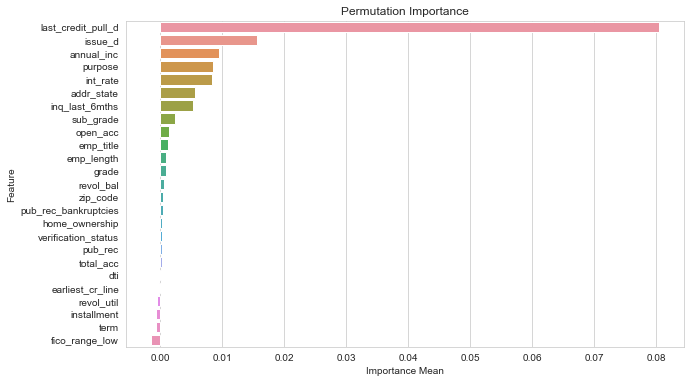

Feature Importance - Random Forest
------------------------------------------
                 Feature  Importance Mean  Importance Std
0     last_credit_pull_d           0.0627          0.0039
1             annual_inc           0.0030          0.0015
2                issue_d           0.0027          0.0013
3                purpose           0.0023          0.0016
4               zip_code           0.0011          0.0016
5   pub_rec_bankruptcies           0.0009          0.0003
6                pub_rec           0.0008          0.0009
7         inq_last_6mths           0.0001          0.0011
8         home_ownership           0.0000          0.0010
9              emp_title          -0.0002          0.0006
10             revol_bal          -0.0002          0.0014
11        fico_range_low          -0.0005          0.0012
12              open_acc          -0.0009          0.0006
13   verification_status          -0.0010          0.0011
14            revol_util          -0.0010          0

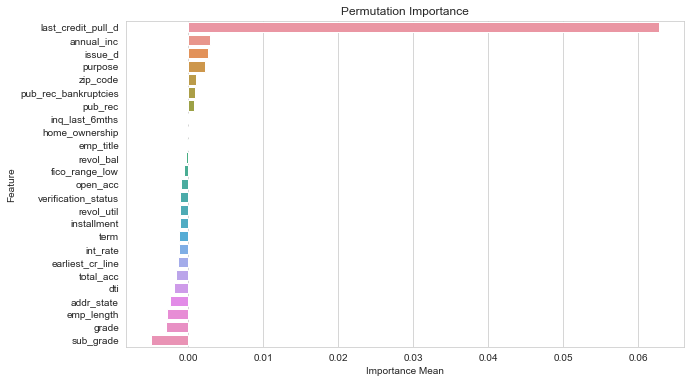

Feature Importance - Gradient Boost
------------------------------------------
                 Feature  Importance Mean  Importance Std
0     last_credit_pull_d           0.1307          0.0031
1             annual_inc           0.0094          0.0025
2               int_rate           0.0073          0.0031
3                issue_d           0.0027          0.0011
4                purpose           0.0024          0.0010
5                   term           0.0017          0.0011
6             addr_state           0.0014          0.0009
7         inq_last_6mths           0.0013          0.0009
8                    dti           0.0001          0.0005
9              sub_grade           0.0001          0.0002
10             emp_title           0.0001          0.0008
11             total_acc           0.0000          0.0004
12            revol_util           0.0000          0.0005
13   verification_status           0.0000          0.0000
14  pub_rec_bankruptcies           0.0000          

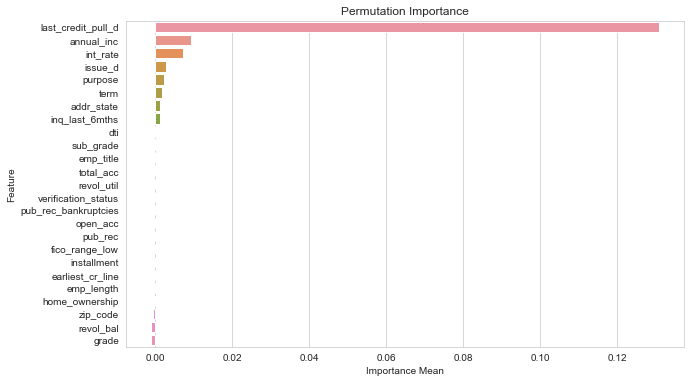

Feature Importance - Neural Network
------------------------------------------
                 Feature  Importance Mean  Importance Std
0     last_credit_pull_d           0.1211          0.0040
1                issue_d           0.0093          0.0018
2             annual_inc           0.0080          0.0014
3               int_rate           0.0052          0.0029
4                purpose           0.0049          0.0012
5             addr_state           0.0035          0.0014
6               open_acc           0.0032          0.0015
7    verification_status           0.0031          0.0006
8         inq_last_6mths           0.0029          0.0012
9                    dti           0.0015          0.0010
10                 grade           0.0013          0.0011
11             total_acc           0.0011          0.0005
12        fico_range_low           0.0011          0.0017
13             sub_grade           0.0009          0.0013
14           installment           0.0008          

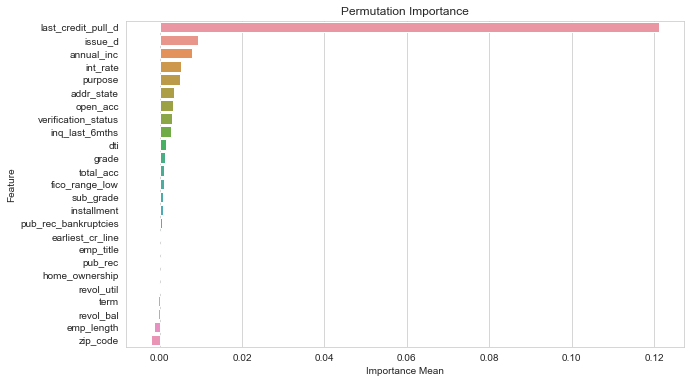

Feature Importance - Stacking Classifier
------------------------------------------
                 Feature  Importance Mean  Importance Std
0     last_credit_pull_d           0.1167          0.0026
1             annual_inc           0.0097          0.0033
2               int_rate           0.0058          0.0028
3                issue_d           0.0039          0.0014
4                purpose           0.0031          0.0012
5             addr_state           0.0015          0.0006
6         inq_last_6mths           0.0013          0.0017
7                    dti           0.0008          0.0006
8              total_acc           0.0008          0.0006
9       earliest_cr_line           0.0007          0.0004
10            revol_util           0.0006          0.0005
11              open_acc           0.0006          0.0006
12              zip_code           0.0004          0.0011
13             emp_title           0.0003          0.0006
14           installment           0.0001     

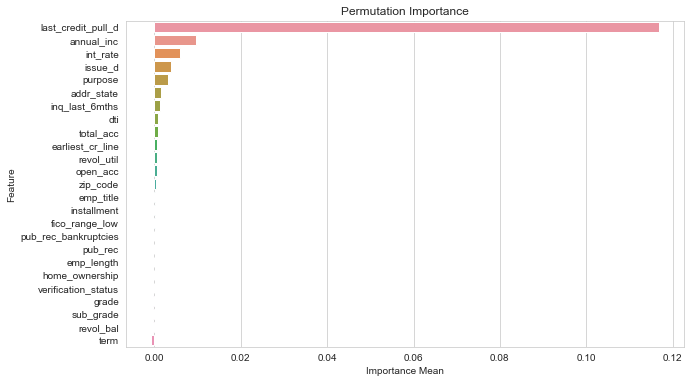

In [68]:
for model_name, model_pipeline in models.items():
    from sklearn.inspection import permutation_importance
    result = permutation_importance(model_pipeline, X_test, y_test,
                                    n_repeats=10, random_state=42,
                                    n_jobs=-1)

    feature_names = numeric_features + categorical_features

    feature_importances_df = pd.DataFrame({
        'Feature': feature_names,  # Or 'feature_names' if applicable
        'Importance Mean': result.importances_mean,
        'Importance Std': result.importances_std
    }).sort_values(by='Importance Mean', ascending=False).reset_index(drop=True)
    print(f'Feature Importance - {model_name}')
    print('------------------------------------------')
    print(feature_importances_df.round(4))
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importances_df, x='Importance Mean', y='Feature')
    plt.title('Permutation Importance')
    plt.show()

# Part 5 - Our Best Model - Gradient Boost

### 5.1 - Partial Dependance Plot - Numeric features

In [69]:
# !pip install -U scikit-learn
numeric_features

['installment',
 'annual_inc',
 'dti',
 'fico_range_low',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'pub_rec_bankruptcies',
 'int_rate',
 'revol_util',
 'issue_d',
 'earliest_cr_line',
 'last_credit_pull_d']

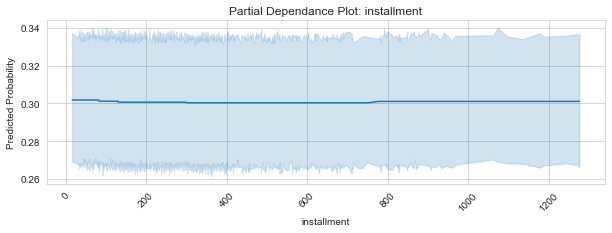

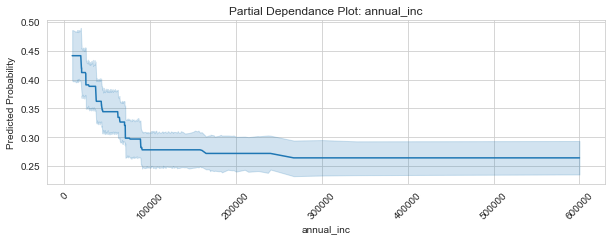

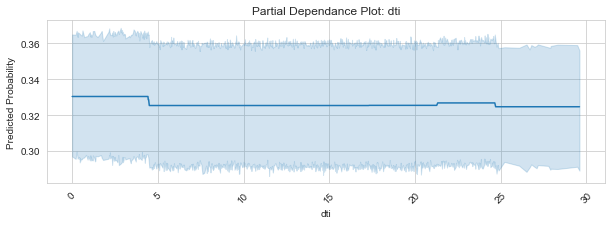

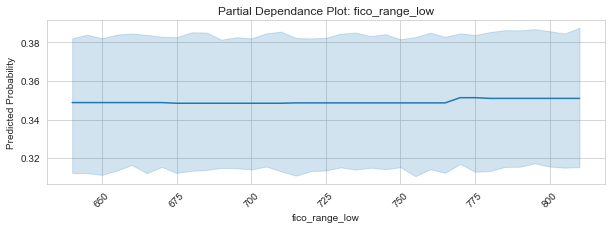

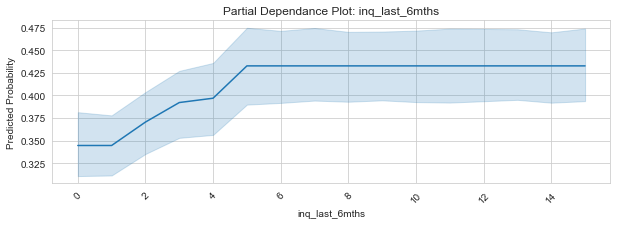

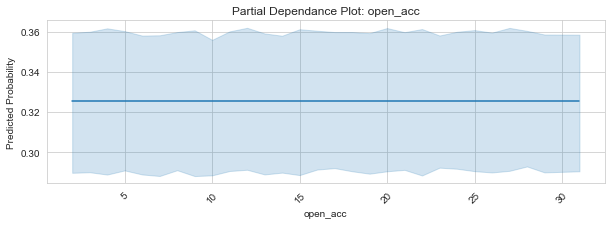

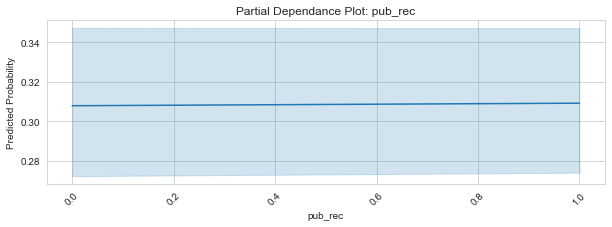

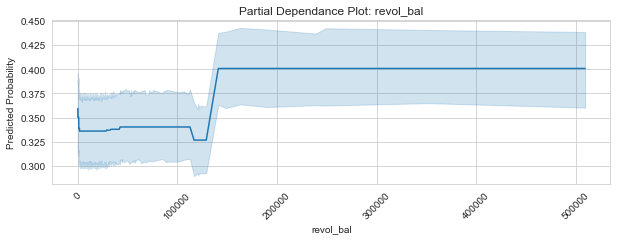

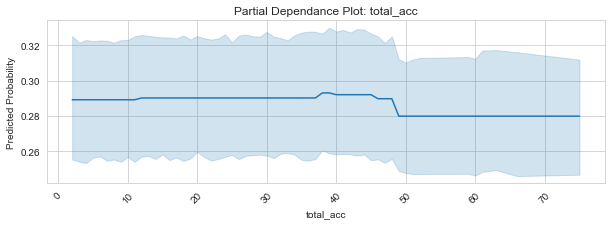

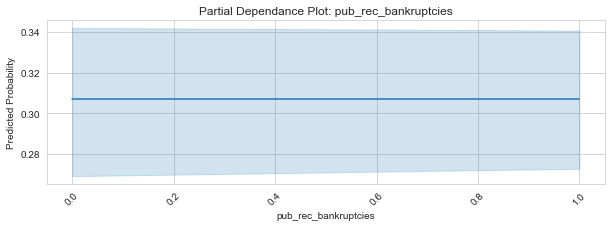

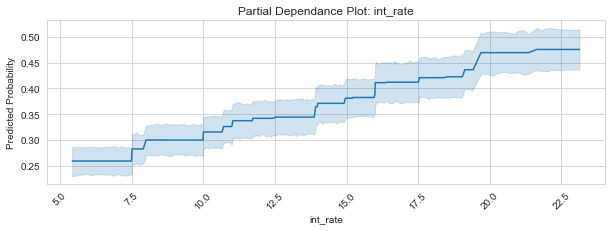

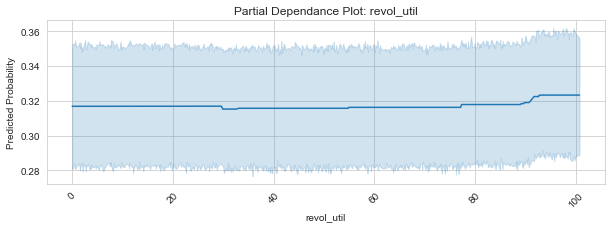

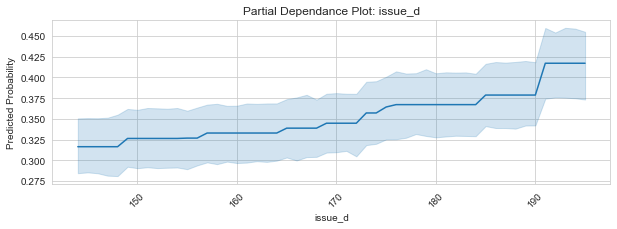

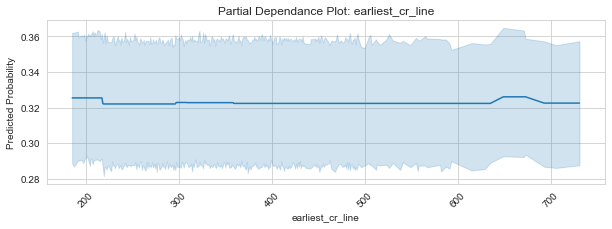

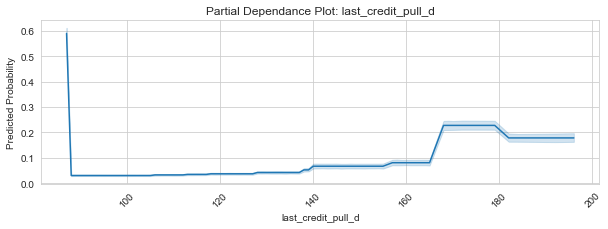

In [70]:
def pdp_plot_numeric(var, sample_n):
  # var = 'credit_amount'
  pdp_values = pd.DataFrame(X_train[var].sort_values().sample(frac=0.1).unique(),columns=[var])
  pdp_sample = X_train.sample(sample_n).drop(var, axis=1)

  pdp_cross = pdp_sample.merge(pdp_values, how='cross')
  pdp_cross['pred'] = gbm_pipeline_hpo.predict_proba(pdp_cross)[:,1]
  plt.figure(figsize=(10, 3))
  sns.lineplot(x=f"{var}", y='pred', data=pdp_cross)
  plt.title(f"Partial Dependance Plot: {var}")
  plt.ylabel('Predicted Probability')
  plt.xticks(rotation=45)
  #plt.ylim(0, 1)
  plt.grid(True)
  plt.show()

for var in numeric_features:
  pdp_plot_numeric(var, sample_n=300)

### 5.2 - Partial Dependance Plot - Categorical features

In [71]:
categorical_features_eda

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'purpose',
 'addr_state',
 'verification_status']

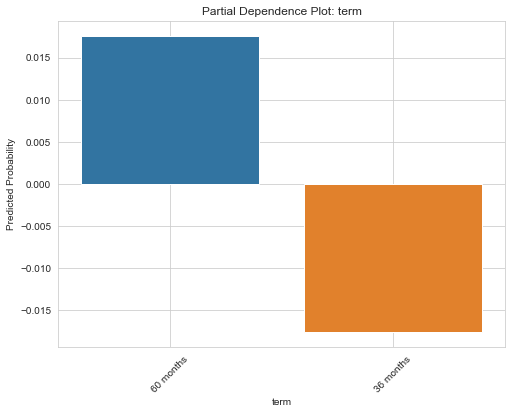

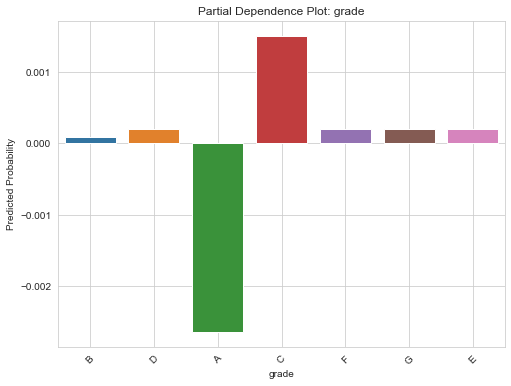

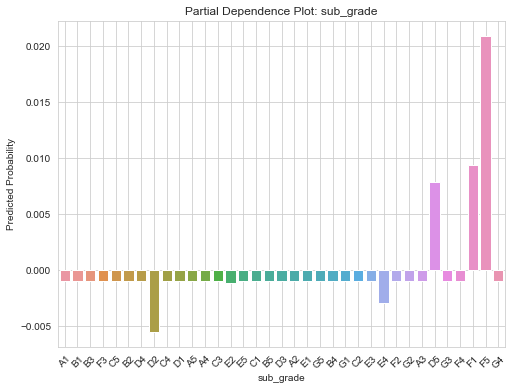

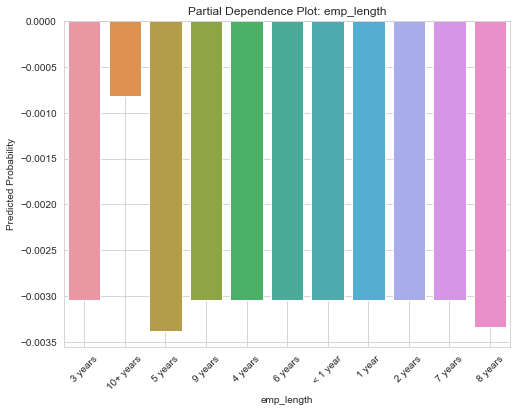

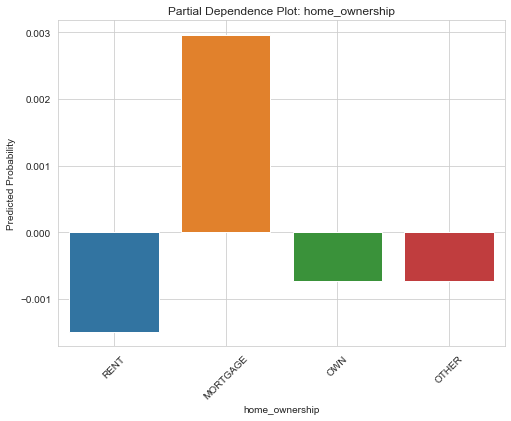

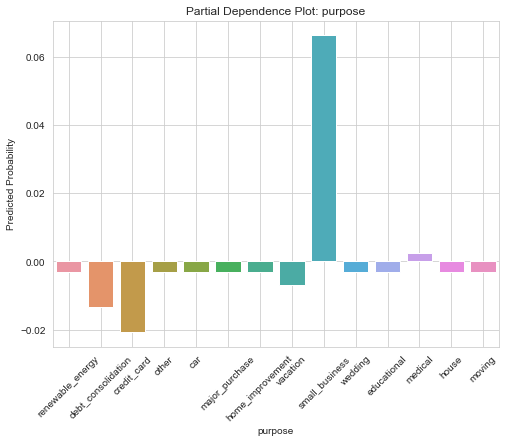

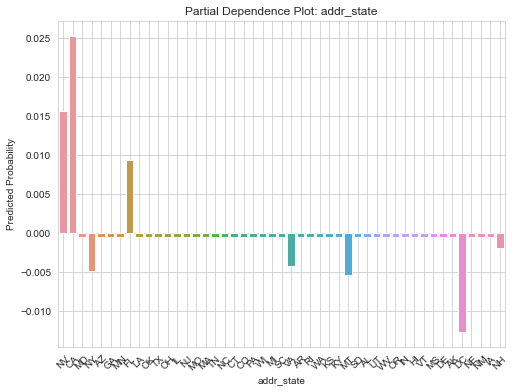

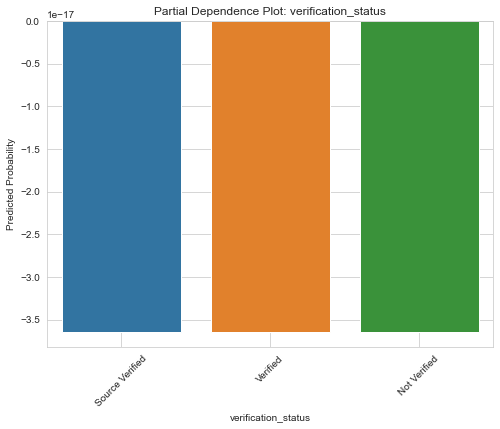

In [72]:
def pdp_plot_categorical(ax, X_train, var, sample_n, pipeline):
    pdp_values = pd.DataFrame(X_train[var].sample(frac=0.1).unique(), columns=[var])
    pdp_sample = X_train.drop(columns=[var]).sample(sample_n)

    pdp_cross = pdp_sample.assign(key=1).merge(pdp_values.assign(key=1), on='key').drop(columns='key')
    pdp_cross['pred'] = pipeline.predict_proba(pdp_cross)[:, 1]
    mean_pred = pdp_cross['pred'].mean()
    pdp_cross['pred'] = pdp_cross['pred'] - mean_pred

    sns.barplot(ax=ax, y='pred', x=var, ci=None, data=pdp_cross, estimator=np.mean) 
    ax.set_title(f"Partial Dependence Plot: {var}")
    ax.set_xlabel(var) 
    ax.set_ylabel('Predicted Probability') 
    ax.tick_params(axis='x', rotation=45)  
    ax.grid(True)

for var in categorical_features_eda:  
    fig, ax = plt.subplots(figsize=(8, 6)) 
    pdp_plot_categorical(ax, X_train, var, sample_n=500, pipeline=gbm_pipeline_hpo)
    plt.show() 

In [73]:
import dalex as dx # for explanations
pipeline_explainer = dx.Explainer(gbm_pipeline_hpo, X_test, y_test)
pipeline_explainer

Preparation of a new explainer is initiated

  -> data              : 5956 rows 25 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 5956 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x17bbb3a60> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0126, mean = 0.249, max = 0.957
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.902, mean = -0.101, max = 0.982
  -> model_info        : package sklearn

A new explainer has been created!


In [74]:
model_performance  = pipeline_explainer.model_performance("classification")
model_performance.result

recall  precision        f1  accuracy       auc
GradientBoostingClassifier  0.779796   0.440385  0.562884  0.820853  0.893645

In [75]:
# Calculate feature importance
fi = pipeline_explainer.model_parts(processes=4)

# Plot feature importance
fi.plot()

# Part 6 - Local Explanation

In [76]:
def plot_local_breakdown_interactions(top_10_tp, pipeline_explainer):
    for index, row in top_10_tp.iterrows():
        local_breakdown_exp = pipeline_explainer.predict_parts(
            top_10_tp.iloc[index],
            type='break_down_interactions',
            label=f"record:{index}, prob:{row['pred_proba']:.3f}")

        local_breakdown_exp.plot()

In [77]:
X_test['pred']= gbm_pipeline_hpo.predict(X_test)
X_test['pred_proba']= gbm_pipeline_hpo.predict_proba(X_test)[:,1]
X_test[target] = y_test
X_test.head()

installment  annual_inc    dti  fico_range_low  inq_last_6mths  \
13494       131.95     17760.0  20.20           750.0             0.0   
21759       323.85     55000.0  18.59           715.0             0.0   
11247       560.56     53000.0  22.42           740.0             1.0   
25028       189.98     50000.0  21.58           665.0             2.0   
20440       232.58     45000.0   5.97           765.0             0.0   

       open_acc  pub_rec  revol_bal  total_acc  pub_rec_bankruptcies  ...  \
13494       9.0      0.0     1639.0       24.0                   0.0  ...   
21759       7.0      0.0     5571.0       20.0                   0.0  ...   
11247      21.0      0.0      520.0       59.0                   0.0  ...   
25028      17.0      0.0    13594.0       38.0                   0.0  ...   
20440       3.0      0.0      530.0       17.0                   0.0  ...   

                    emp_title  emp_length  home_ownership             purpose  \
13494          Fiesta Canning    < 1 year             OWN  debt_consolidation   
21759           The NPD Group     3 years            RENT    home_improvement   
11247     Toyota Motor Mfg WV     8 years        MORTGAGE  debt_consolidation   
25028      Allstate Insurance     4 years        MORTGAGE         credit_card   
20440  Mission Community Bank     3 years            RENT  debt_consolidation   

       zip_code addr_state verification_status pred pred_proba loan_status  
13494     856xx         AZ     Source Verified    0   0.051992           0  
21759     117xx         NY        Not Verified    0   0.025936           0  
11247     255xx         WV            Verified    0   0.024316           0  
25028     945xx         CA        Not Verified    1   0.754391           0  
20440     934xx         CA        Not Verified    1   0.734469           1  

[5 rows x 28 columns]

### 6.1 - Explaining True Positives

In [78]:
# Top 10 True Positives (TP)

top_10_tp = (X_test
             .query('loan_status == pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
)
top_10_tp

installment  annual_inc    dti  fico_range_low  inq_last_6mths  open_acc  \
0       489.29     65000.0  21.93           655.0             6.0       9.0   
1       795.11    616000.0   3.83           780.0             5.0      12.0   
2       108.71     24000.0   2.00           660.0             0.0       3.0   
3       296.46     85000.0   9.94           690.0             6.0      12.0   
4        57.41     35000.0  10.94           705.0             6.0       7.0   
5       255.46     60000.0   3.96           765.0             5.0       4.0   
6       337.20     50000.0  18.77           735.0             2.0       2.0   
7       235.33     14400.0   3.00           705.0             2.0       6.0   
8       196.18      7000.0   8.57           680.0             2.0       1.0   
9       268.95     13000.0   0.00           715.0             3.0       5.0   

   pub_rec  revol_bal  total_acc  pub_rec_bankruptcies  ...  \
0      0.0      254.0       30.0                   NaN  ...   
1      0.0   148829.0       43.0                   NaN  ...   
2      0.0      469.0        7.0                   0.0  ...   
3      0.0     7491.0       15.0                   0.0  ...   
4      0.0    10008.0       12.0                   NaN  ...   
5      0.0     7576.0       10.0                   0.0  ...   
6      0.0      517.0       16.0                   0.0  ...   
7      0.0     3449.0        6.0                   0.0  ...   
8      0.0        0.0        2.0                   NaN  ...   
9      0.0        0.0        5.0                   0.0  ...   

                          emp_title  emp_length  home_ownership  \
0                      Accushutters      1 year        MORTGAGE   
1  SmartProperties.org Construction   10+ years        MORTGAGE   
2         Shetler Security Services     2 years            RENT   
3                               NaN    < 1 year            RENT   
4               bay area montesorri    < 1 year            RENT   
5                               NaN     9 years             OWN   
6                          Acapulco     2 years            RENT   
7                               NaN     2 years            RENT   
8              UWF Parking Services    < 1 year            RENT   
9       Mainstay Business Solutions    < 1 year            RENT   

          purpose  zip_code addr_state verification_status pred pred_proba  \
0  small_business     330xx         FL        Not Verified    1   0.956980   
1  small_business     328xx         FL        Not Verified    1   0.950501   
2  small_business     850xx         AZ     Source Verified    1   0.947289   
3  small_business     916xx         CA            Verified    1   0.941127   
4         medical     337xx         FL        Not Verified    1   0.935319   
5  small_business     973xx         OR     Source Verified    1   0.931537   
6  small_business     917xx         CA     Source Verified    1   0.923515   
7           other     937xx         CA        Not Verified    1   0.923440   
8           house     325xx         FL        Not Verified    1   0.921421   
9     educational     933xx         CA        Not Verified    1   0.917564   

  loan_status  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1  

[10 rows x 28 columns]

In [79]:
for index, row in top_10_tp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_tp.iloc[index],
      type='break_down',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

### 6.2 - Explaining False Positives

In [80]:
# Top 10 False Positives (FP)

top_10_fp = (X_test
             .query('loan_status != pred and loan_status == 0')
             .sort_values(by='pred_proba', ascending=False)
             .head(10)
             .reset_index(drop=True)
            )

top_10_fp

installment  annual_inc    dti  fico_range_low  inq_last_6mths  open_acc  \
0        25.80      6000.0   0.00           680.0             1.0       5.0   
1       207.22     20000.0  18.18           690.0             0.0       2.0   
2        46.91     17000.0  20.40           670.0             6.0       8.0   
3        69.32     49000.0  22.10           660.0             2.0      15.0   
4       133.81     36000.0   7.17           670.0             0.0       3.0   
5        34.59     18000.0   0.00           710.0             2.0      11.0   
6       186.46     36000.0  16.03           650.0             4.0       7.0   
7       437.92     42000.0   9.03           715.0             1.0       6.0   
8       139.17     10800.0   0.00           745.0             2.0       3.0   
9       268.95     81600.0   4.97           785.0             3.0       4.0   

   pub_rec  revol_bal  total_acc  pub_rec_bankruptcies  ...  \
0      0.0        0.0        5.0                   NaN  ...   
1      0.0     1315.0       11.0                   0.0  ...   
2      0.0     3368.0        8.0                   0.0  ...   
3      0.0     8158.0       34.0                   0.0  ...   
4      0.0     3471.0        9.0                   0.0  ...   
5      0.0        0.0       11.0                   0.0  ...   
6      0.0     3132.0       20.0                   NaN  ...   
7      0.0    13399.0       12.0                   0.0  ...   
8      0.0        0.0       10.0                   0.0  ...   
9      0.0       11.0       26.0                   0.0  ...   

                                           emp_title  emp_length  \
0                                                NaN    < 1 year   
1                                         home depot     3 years   
2                            University of Minnesota     2 years   
3                                Michael Enterprises   10+ years   
4                                bed bath and beyond     3 years   
5                                  Aurora Multimedia    < 1 year   
6  Wisconsin Business Development Finance Corpora...    < 1 year   
7                                   Riverwind Casino     5 years   
8                                        Wells Fargo    < 1 year   
9                                                NaN     5 years   

   home_ownership             purpose  zip_code addr_state  \
0            RENT  debt_consolidation     302xx         GA   
1            RENT  debt_consolidation     935xx         CA   
2            RENT      major_purchase     557xx         MN   
3        MORTGAGE      small_business     497xx         MI   
4            RENT               other     070xx         NJ   
5            RENT              moving     088xx         NJ   
6            RENT  debt_consolidation     532xx         WI   
7        MORTGAGE      small_business     731xx         OK   
8            RENT              moving     941xx         CA   
9            RENT      small_business     605xx         IL   

  verification_status pred pred_proba loan_status  
0        Not Verified    1   0.902170           0  
1            Verified    1   0.899252           0  
2        Not Verified    1   0.897506           0  
3        Not Verified    1   0.896989           0  
4            Verified    1   0.888755           0  
5     Source Verified    1   0.884852           0  
6        Not Verified    1   0.883408           0  
7            Verified    1   0.883073           0  
8        Not Verified    1   0.882881           0  
9            Verified    1   0.879306           0  

[10 rows x 28 columns]

In [81]:
for index, row in top_10_fp.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fp.iloc[index],
      type='break_down',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

### 6.3 - Explaining False Negatives

In [82]:
# Top 10 False Negatives (FN)

top_10_fn = (X_test
             .query('loan_status != pred and loan_status == 1')
             .sort_values(by='pred_proba', ascending=True)
             .head(10)
             .reset_index(drop=True)
)
top_10_fn

installment  annual_inc    dti  fico_range_low  inq_last_6mths  open_acc  \
0       701.48     98000.0  20.85           780.0             0.0      20.0   
1       311.02     59000.0   9.82           780.0             0.0       4.0   
2       247.29     45500.0  18.78           680.0             0.0      16.0   
3       164.86     37000.0  19.20           670.0             0.0      10.0   
4       233.06    150000.0   8.60           695.0             7.0       6.0   
5       152.17    120000.0  17.03           720.0             0.0      14.0   
6       154.71     54000.0  10.71           765.0             1.0      15.0   
7       252.93    110656.0   7.82           670.0             0.0      13.0   
8        94.82     42120.0  15.04           670.0             0.0       5.0   
9       104.75     84000.0  24.06           715.0             2.0       5.0   

   pub_rec  revol_bal  total_acc  pub_rec_bankruptcies  ...  \
0      0.0    12575.0       38.0                   0.0  ...   
1      0.0       83.0       16.0                   0.0  ...   
2      0.0    10933.0       33.0                   0.0  ...   
3      0.0     5505.0       15.0                   0.0  ...   
4      0.0    21293.0        9.0                   0.0  ...   
5      0.0    19237.0       23.0                   0.0  ...   
6      0.0     3371.0       29.0                   0.0  ...   
7      0.0     9869.0       34.0                   0.0  ...   
8      1.0     3266.0       16.0                   1.0  ...   
9      0.0      422.0       20.0                   0.0  ...   

                               emp_title  emp_length  home_ownership  \
0  East Windsor Regional School District   10+ years        MORTGAGE   
1                                    csc   10+ years             OWN   
2                                  GEICO     5 years        MORTGAGE   
3                                  Macys    < 1 year            RENT   
4                 The Perfect Body, Inc.     6 years             OWN   
5                                  ARINC     9 years        MORTGAGE   
6               polk county school board   10+ years        MORTGAGE   
7                             OnLive Inc     3 years        MORTGAGE   
8                    St Johns med center     3 years            RENT   
9             Brawley Insurance Services     3 years            RENT   

              purpose  zip_code addr_state verification_status pred  \
0  debt_consolidation     085xx         NJ            Verified    0   
1      major_purchase     890xx         NV            Verified    0   
2         credit_card     142xx         NY        Not Verified    0   
3         credit_card     236xx         VA            Verified    0   
4         credit_card     327xx         FL        Not Verified    0   
5    home_improvement     741xx         OK        Not Verified    0   
6    home_improvement     338xx         FL        Not Verified    0   
7      major_purchase     940xx         CA     Source Verified    0   
8              moving     930xx         CA        Not Verified    0   
9      major_purchase     937xx         CA     Source Verified    0   

  pred_proba loan_status  
0   0.017775           1  
1   0.021984           1  
2   0.023312           1  
3   0.023676           1  
4   0.024803           1  
5   0.024882           1  
6   0.025856           1  
7   0.026989           1  
8   0.027312           1  
9   0.027315           1  

[10 rows x 28 columns]

In [83]:
for index, row in top_10_fn.iterrows():
  local_breakdown_exp = pipeline_explainer.predict_parts(
      top_10_fn.iloc[index],
      type='break_down',
      label=f"record:{index}, prob:{row['pred_proba']:.3f}")

  local_breakdown_exp.plot()

# Make Prediction on Holdout Dataset

In [84]:
# Load the dataset
df_ho = pd.read_csv('/Users/helenas/Desktop/Machine Learning/Project/Final_project_20240308/loan_holdout.csv')

df_ho

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0      1077175    1313524       2400         2400           2400.0  36 months   
1      1075358    1311748       3000         3000           3000.0  60 months   
2      1075269    1311441       5000         5000           5000.0  36 months   
3      1071570    1306721       5375         5375           5350.0  60 months   
4      1064687    1298717       9000         9000           9000.0  36 months   
...        ...        ...        ...          ...              ...        ...   
12756    88637      88629       6000         6000            650.0  36 months   
12757    85961      85923       1200         1200            500.0  36 months   
12758    83979      83974       3000         3000            250.0  36 months   
12759    77757      70626       3000         3000              0.0  36 months   
12760    70686      70681       5000         5000              0.0  36 months   

      int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       15.96%        84.33     C        C5  ...          NaN   
1       12.69%        67.79     B        B5  ...     Oct-2016   
2        7.90%       156.46     A        A4  ...          NaN   
3       12.69%       121.45     B        B5  ...          NaN   
4       13.49%       305.38     C        C1  ...          NaN   
...        ...          ...   ...       ...  ...          ...   
12756   10.59%       195.28     C        C2  ...     Jul-2010   
12757    9.01%        38.17     B        B2  ...     Jul-2010   
12758    7.43%        93.23     A        A2  ...     Jan-2008   
12759    9.33%        95.86     B        B3  ...     Jul-2010   
12760    7.75%       156.11     A        A3  ...     Jul-2010   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0               Sep-2016                        0.0            1   
1               Sep-2016                        0.0            1   
2               Jan-2016                        0.0            1   
3               Sep-2016                        0.0            1   
4               Sep-2016                        0.0            1   
...                  ...                        ...          ...   
12756           Oct-2014                        NaN            1   
12757           Sep-2016                        NaN            1   
12758           Jun-2007                        NaN            1   
12759           May-2007                        NaN            1   
12760           Feb-2015                        NaN            1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL            0.0                      0.0         0.0   
1           INDIVIDUAL            0.0                      0.0         0.0   
2           INDIVIDUAL            0.0                      0.0         0.0   
3           INDIVIDUAL            0.0                      0.0         0.0   
4           INDIVIDUAL            0.0                      0.0         0.0   
...                ...            ...                      ...         ...   
12756       INDIVIDUAL            0.0                      NaN         0.0   
12757       INDIVIDUAL            NaN                      NaN         NaN   
12758       INDIVIDUAL            NaN                      NaN         NaN   
12759       INDIVIDUAL            NaN                      NaN         NaN   
12760       INDIVIDUAL            NaN                      NaN         NaN   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
12756                  NaN       NaN  
12757                  NaN       NaN  
12758                  NaN       NaN  
12759                  NaN       NaN  
12760                  NaN       NaN  

[12761 rows x 51 columns]

In [85]:
# Transform rates into numeric

df_ho['int_rate'] = df_ho['int_rate'].str.strip('%').astype('float64')
df_ho['revol_util'] = df_ho['revol_util'].str.strip('%').astype('float64')

In [86]:
# Calculate the count of months from each date up to Dec-2023

def count_month(feature):
    dates_datetime = pd.to_datetime(df_ho[feature], format='%b-%Y', errors='coerce')
    end_date = pd.Timestamp('Dec-2023')
    df_ho[feature] = ((end_date.year - dates_datetime.dt.year) * 12 + (end_date.month - dates_datetime.dt.month))

for i in date_cat_to_num:
    count_month(i)

In [87]:
holdout = df_ho[feature_names]

# Predict on holdout set
holdout_proba = gbm_pipeline_hpo.predict_proba(holdout)[:,1]

In [88]:
# Apply threshold for 5% FPR
holdout_pred = np.where(holdout_proba > 0.7132, 1, 0)

In [89]:
df_ho_sub = pd.DataFrame({
    "ID": df_ho["id"],
    "P_DEFAULT": holdout_pred
})

In [90]:
df_ho_sub['P_DEFAULT'].value_counts()

0    11416
1     1345
Name: P_DEFAULT, dtype: int64

In [91]:
df_ho_sub = pd.DataFrame({
    "ID": df_ho["id"],
    "P_DEFAULT": holdout_proba
})

In [92]:
df_ho_sub.to_csv('/Users/helenas/Desktop/Machine Learning/Project/Final_project_20240308/loan_holdout_pred.csv')